<a id=0></a>
# 9.Regression Models
※　代表的な回帰分析モデルの紹介  
※　モデルの評価、交差検証、パラメータのグリッドサーチ

---
### [1. 探索的データ分析（EDA）](#1)
### [2. LinearRegression](#2)
### [3. RandomForestRegressor](#3)
### [4. KNeighborsRegressor](#4)
### [5. モデルの評価](#5)
### [6. クロスバリデーションとグリッドサーチ](#6)
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='talk', style='darkgrid')
import japanize_matplotlib

---
<a id=1></a>
[Topへ](#0)

---
## 1. 探索的データ分析（EDA）¶

* 糖尿病のデータセット
* 分布の確認
* 相関関係
* トレインデータ、テストデータ

糖尿病のデータセット

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
diabetes = load_diabetes()

In [4]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [5]:
X, y = load_diabetes(return_X_y=True)

In [6]:
X[:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665608,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02268774, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187239,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03198764, -0.04664087]])

In [7]:
X.shape

(442, 10)

In [8]:
y.shape

(442,)

In [9]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [10]:
y.reshape(-1, 1).shape

(442, 1)

In [11]:
df = pd.DataFrame(
					np.concatenate([X, y.reshape(-1, 1)], axis=1),
					columns = diabetes.feature_names + ['target']
)

In [12]:
df.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [14]:
df.describe().T

count          mean        std        min        25%         50%  \
age     442.0 -2.511817e-19   0.047619  -0.107226  -0.037299    0.005383   
sex     442.0  1.230790e-17   0.047619  -0.044642  -0.044642   -0.044642   
bmi     442.0 -2.245564e-16   0.047619  -0.090275  -0.034229   -0.007284   
bp      442.0 -4.797570e-17   0.047619  -0.112399  -0.036656   -0.005670   
s1      442.0 -1.381499e-17   0.047619  -0.126781  -0.034248   -0.004321   
s2      442.0  3.918434e-17   0.047619  -0.115613  -0.030358   -0.003819   
s3      442.0 -5.777179e-18   0.047619  -0.102307  -0.035117   -0.006584   
s4      442.0 -9.042540e-18   0.047619  -0.076395  -0.039493   -0.002592   
s5      442.0  9.293722e-17   0.047619  -0.126097  -0.033246   -0.001947   
s6      442.0  1.130318e-17   0.047619  -0.137767  -0.033179   -0.001078   
target  442.0  1.521335e+02  77.093005  25.000000  87.000000  140.500000   

               75%         max  
age       0.038076    0.110727  
sex       0.050680    0.050680  
bmi       0.031248    0.170555  
bp        0.035644    0.132044  
s1        0.028358    0.153914  
s2        0.029844    0.198788  
s3        0.029312    0.181179  
s4        0.034309    0.185234  
s5        0.032432    0.133597  
s6        0.027917    0.135612  
target  211.500000  346.000000

In [15]:
(1 / len(df)) ** 0.5 # 標準偏差

0.04756514941544941

分布の確認

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
def plot_data(feature):
	fig, axes = plt.subplots(1, 3, figsize=(16, 4), tight_layout=True)
	sns.histplot(data=df, x=feature, hue='sex', palette='Set1', multiple='dodge', ax=axes[0], legend=False)
	sns.boxplot(data=df, x='sex', y=feature, palette='Set1', ax=axes[1])
	axes[1].set_xticks([])
	sns.scatterplot(data=df, x=feature, y=y, hue='sex', palette='Set1', ax=axes[2], legend=False)
	bbox = dict(boxstyle="round", fc="0.8")
	axes[2].annotate(f'相関係数:{df[feature].corr(df.target):.2f}', xy=(0.05, 0.8), xycoords='axes fraction', bbox=bbox)
	plt.suptitle(feature)
	plt.show()

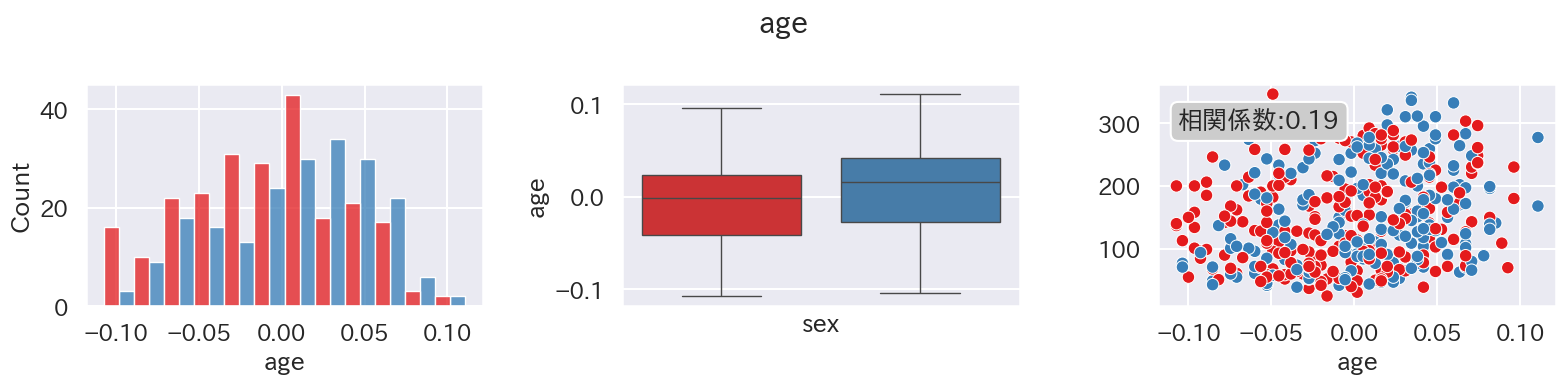

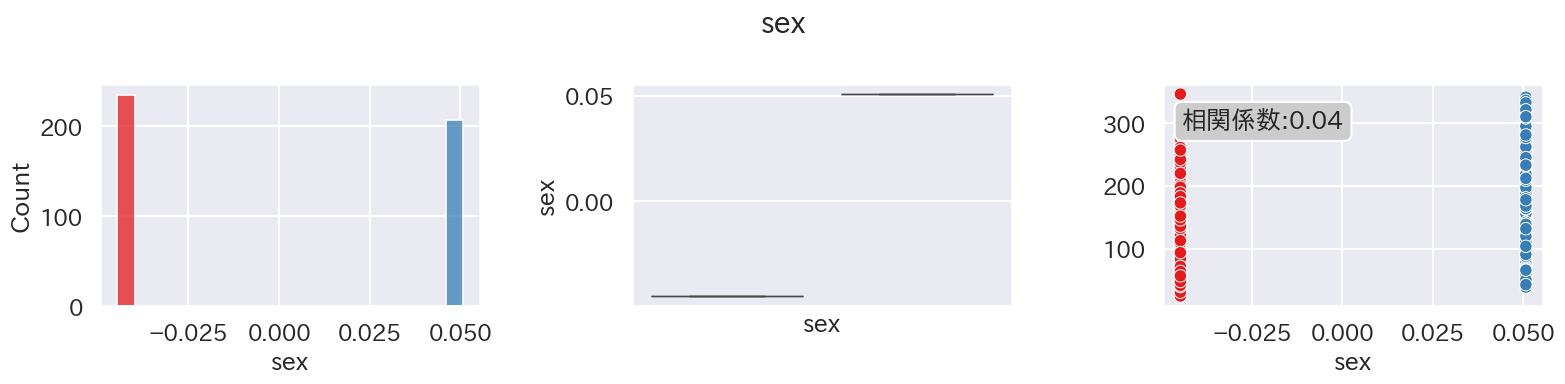

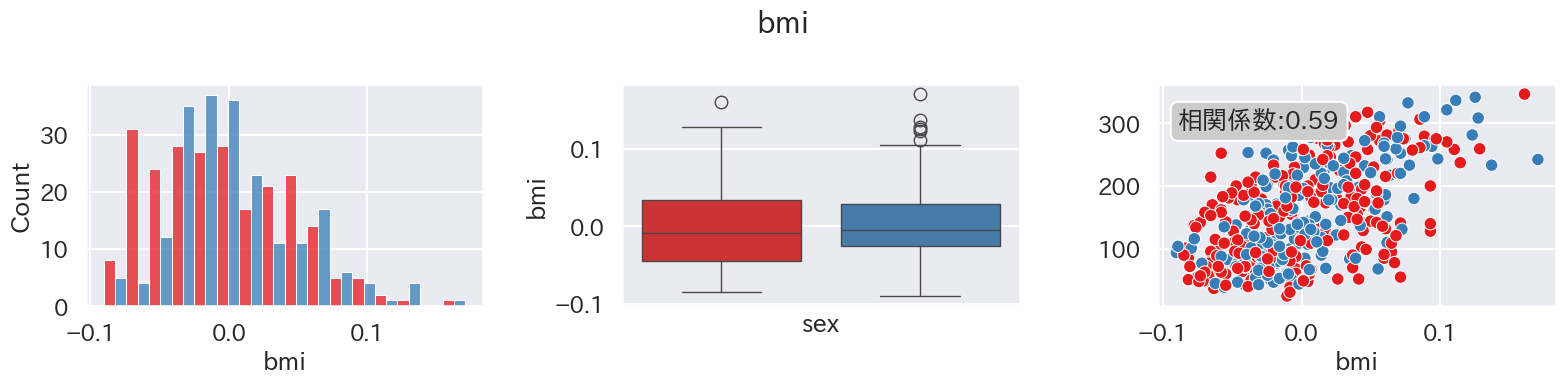

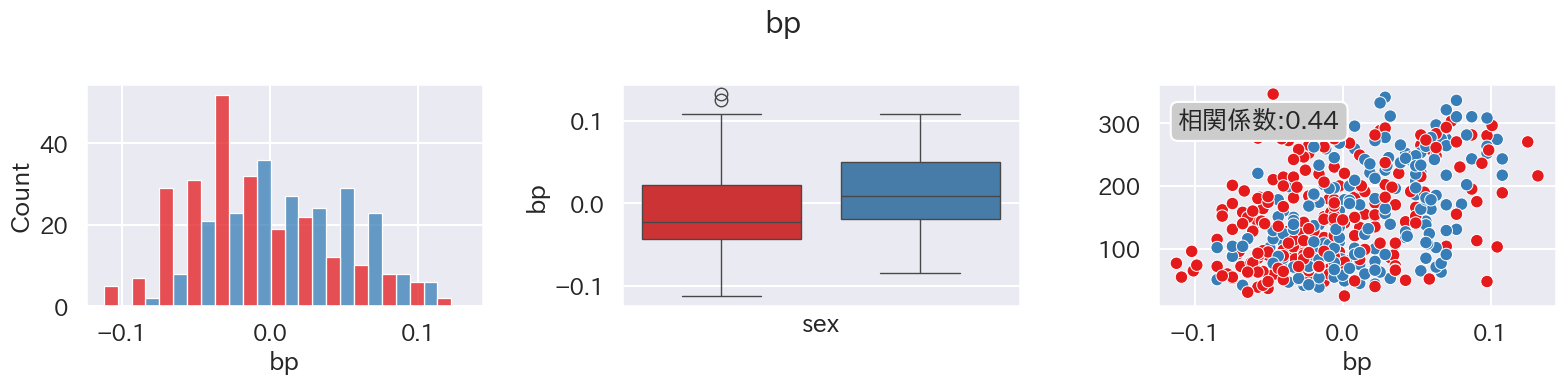

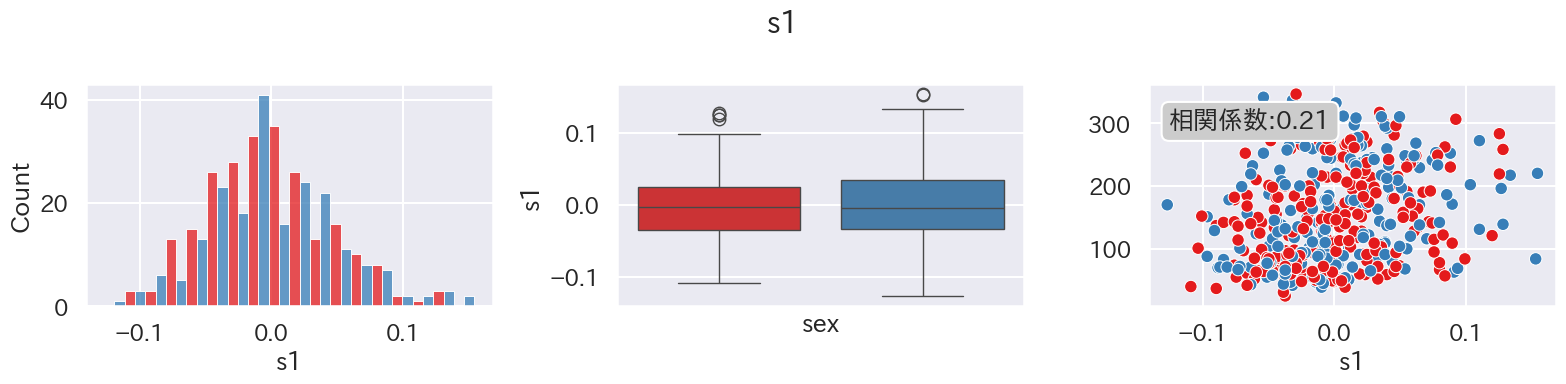

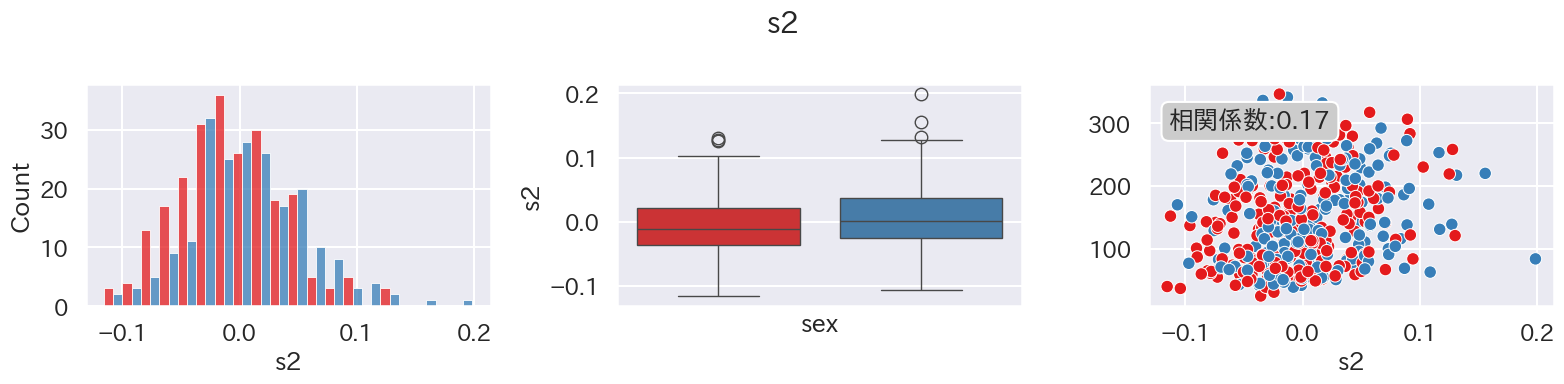

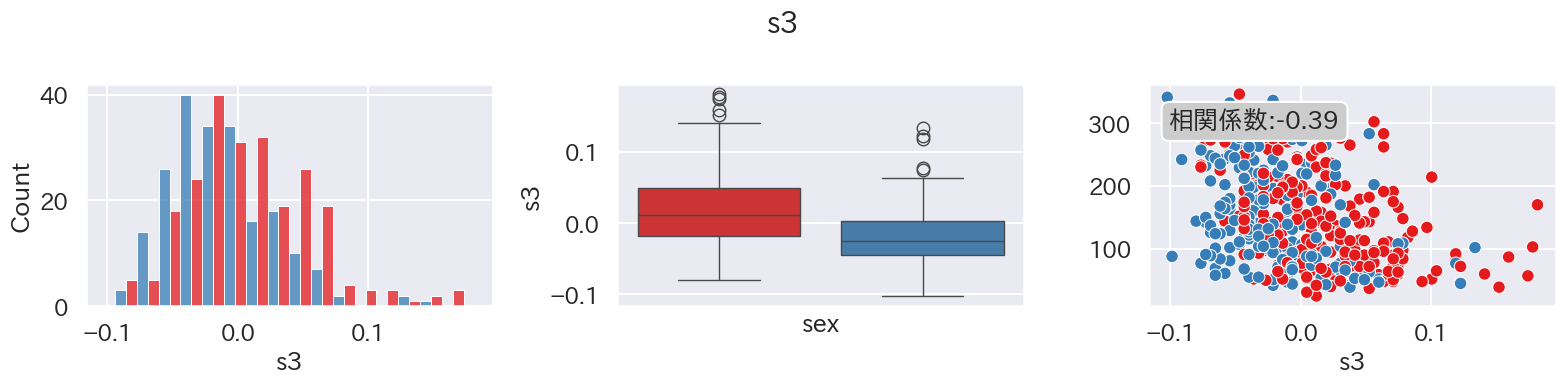

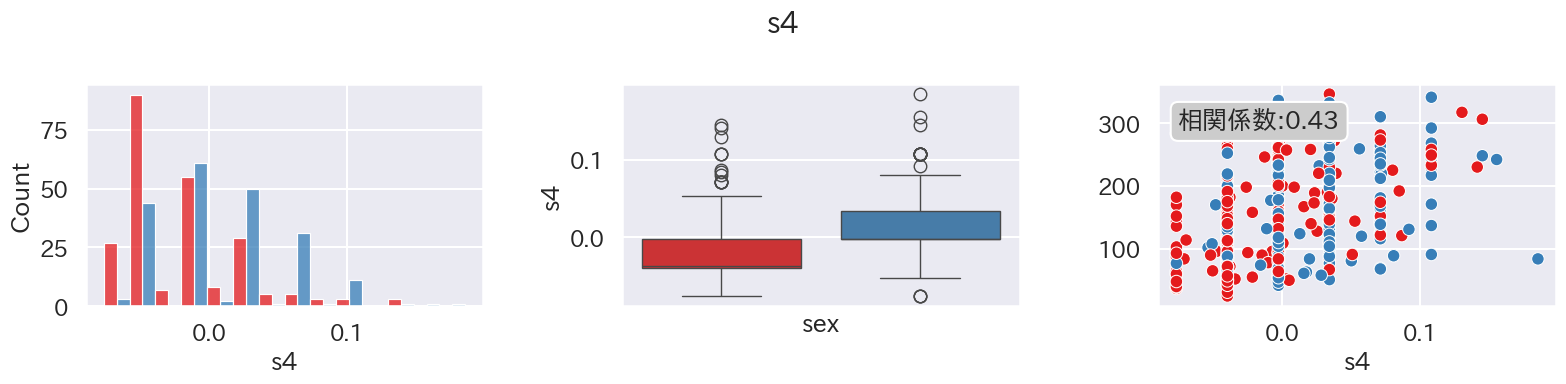

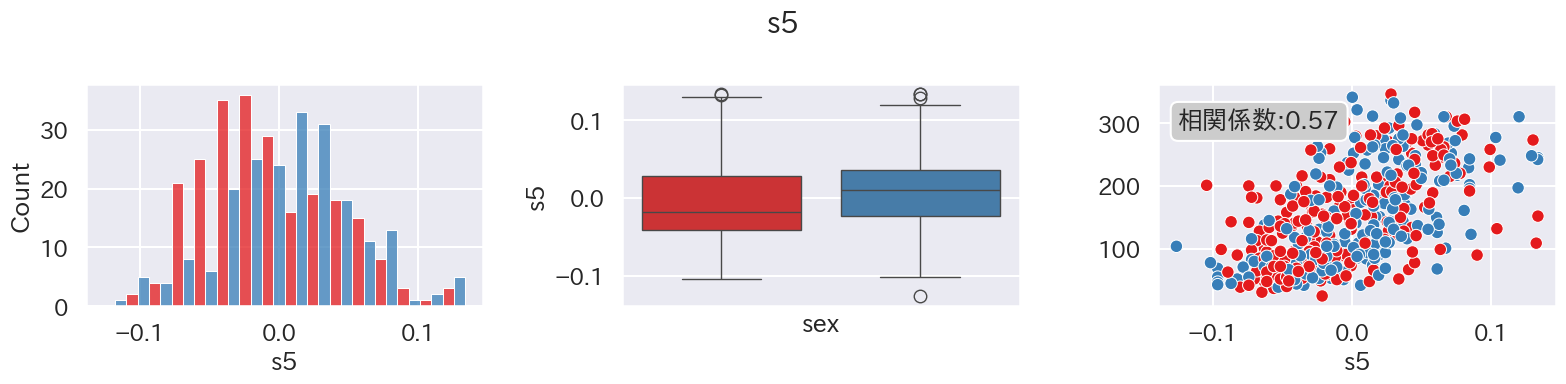

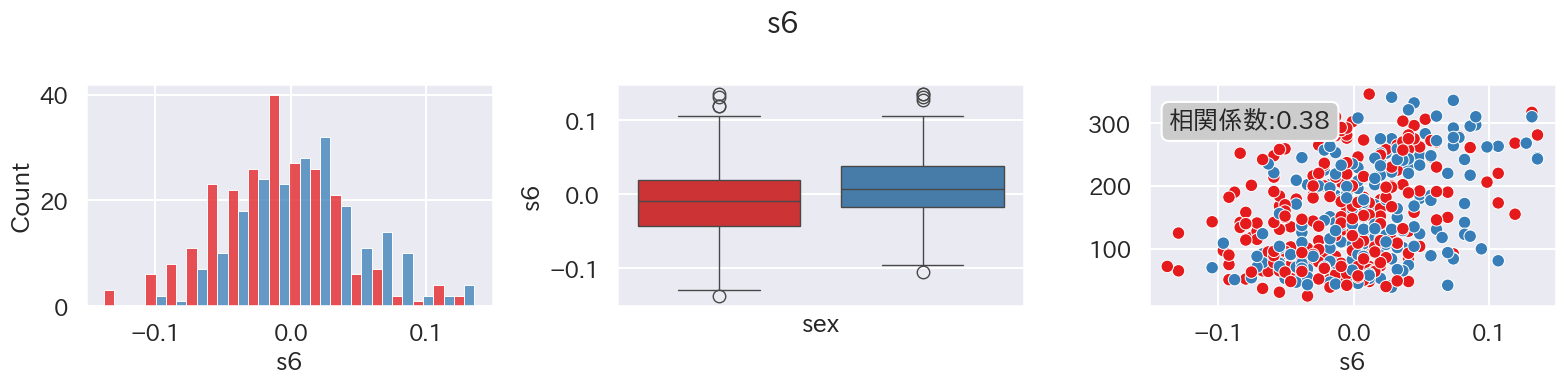

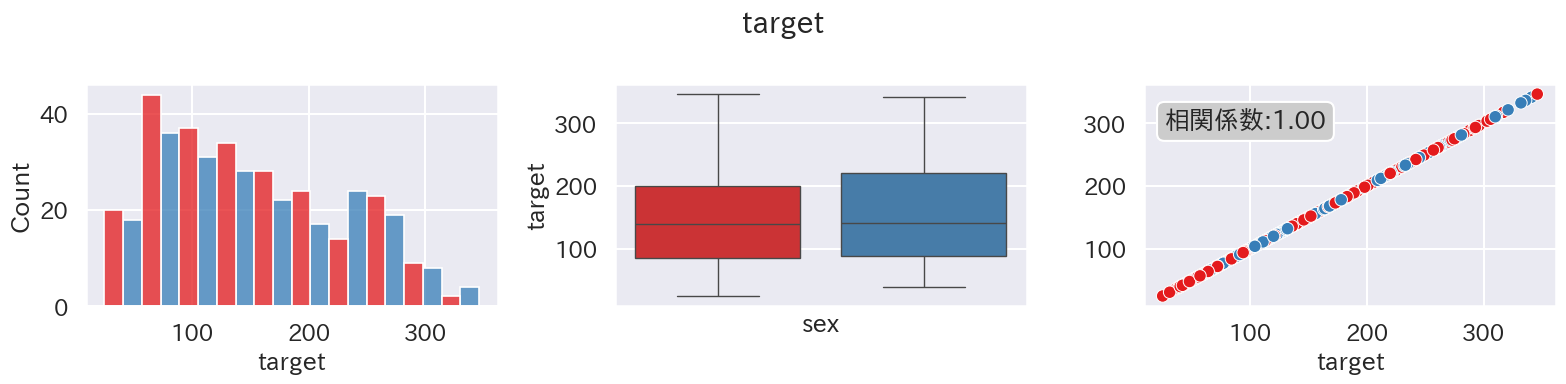

In [26]:
for feature in df.columns:
	plot_data(feature)

相関関係

In [67]:
df.corr()

age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
sex     0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi     0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp      0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1      0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2      0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4      0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5      0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6      0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
target  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

              s4        s5        s6    target  
age     0.203841  0.270774  0.301731  0.187889  
sex     0.332115  0.149916  0.208133  0.043062  
bmi     0.413807  0.446157  0.388680  0.586450  
bp      0.257650  0.393480  0.390430  0.441482  
s1      0.542207  0.515503  0.325717  0.212022  
s2      0.659817  0.318357  0.290600  0.174054  
s3     -0.738493 -0.398577 -0.273697 -0.394789  
s4      1.000000  0.617859  0.417212  0.430453  
s5      0.617859  1.000000  0.464669  0.565883  
s6      0.417212  0.464669  1.000000  0.382483  
target  0.430453  0.565883  0.382483  1.000000

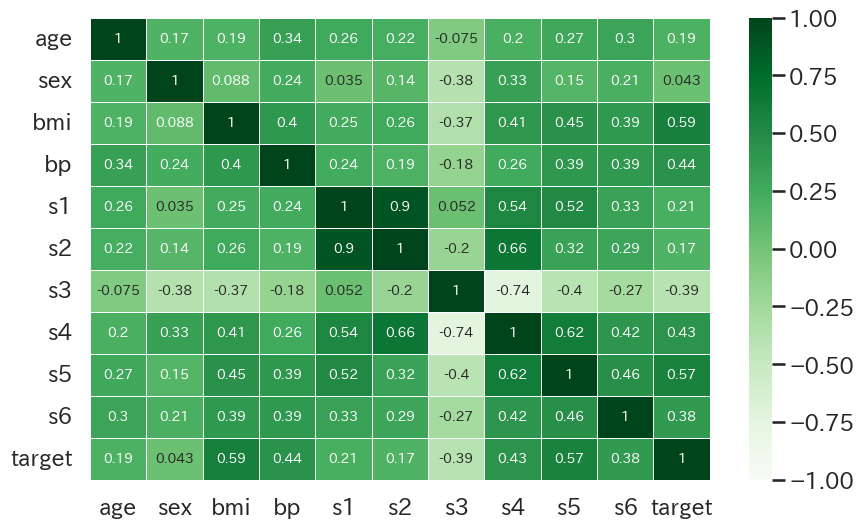

In [74]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, annot_kws={'size': 10}, vmax=1, vmin=-1, center=0, cmap='Greens', linewidths=0.5);

性別で分けてみる

In [30]:
df_s0 = df[df['sex']>0].drop(columns=['sex'], axis=0)
df_s1 = df[df['sex']<0].drop(columns=['sex'], axis=0)

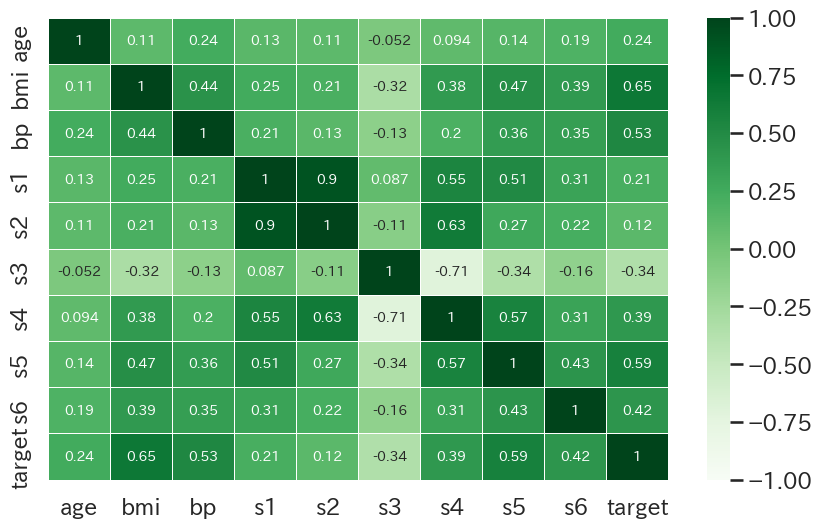

In [76]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_s0.corr(), annot=True, annot_kws={'size': 10}, vmax=1, vmin=-1, center=0, cmap='Greens', linewidths=0.5);

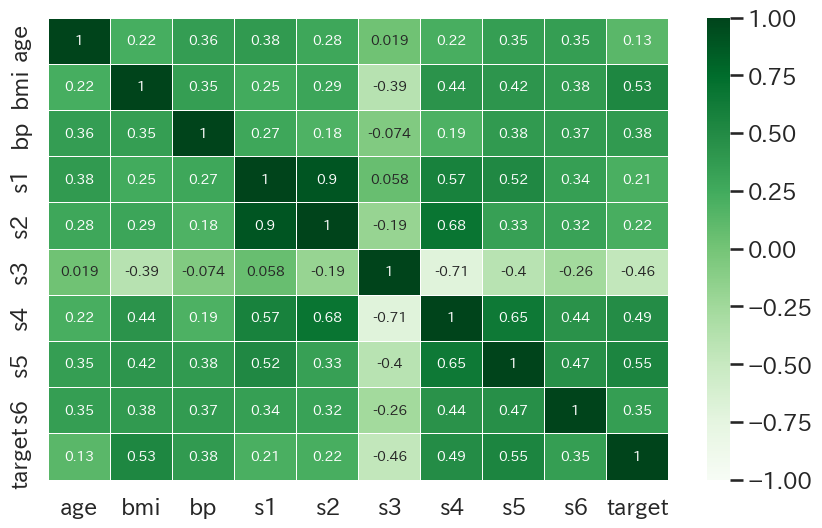

In [77]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_s1.corr(), annot=True, annot_kws={'size': 10}, vmax=1, vmin=-1, center=0, cmap='Greens', linewidths=0.5);

In [41]:
def plot_data(feature):
	fig, axes = plt.subplots(1, 3, figsize=(16, 4), tight_layout=True)
	sns.histplot(data=df_s0, x=feature, palette='Set1', multiple='dodge', ax=axes[0], legend=False)
	sns.boxplot(data=df_s0, y=feature, ax=axes[1])
	axes[1].set_xticks([])
	sns.scatterplot(data=df_s0, x=feature, y=df_s0['target'], palette='Set1', ax=axes[2], legend=False)
	bbox = dict(boxstyle="round", fc="0.8")
	axes[2].annotate(f'相関係数:{df_s0[feature].corr(df_s0.target):.2f}', xy=(0.05, 0.8), xycoords='axes fraction', bbox=bbox)
	plt.suptitle(feature+'_s0')
	plt.show()

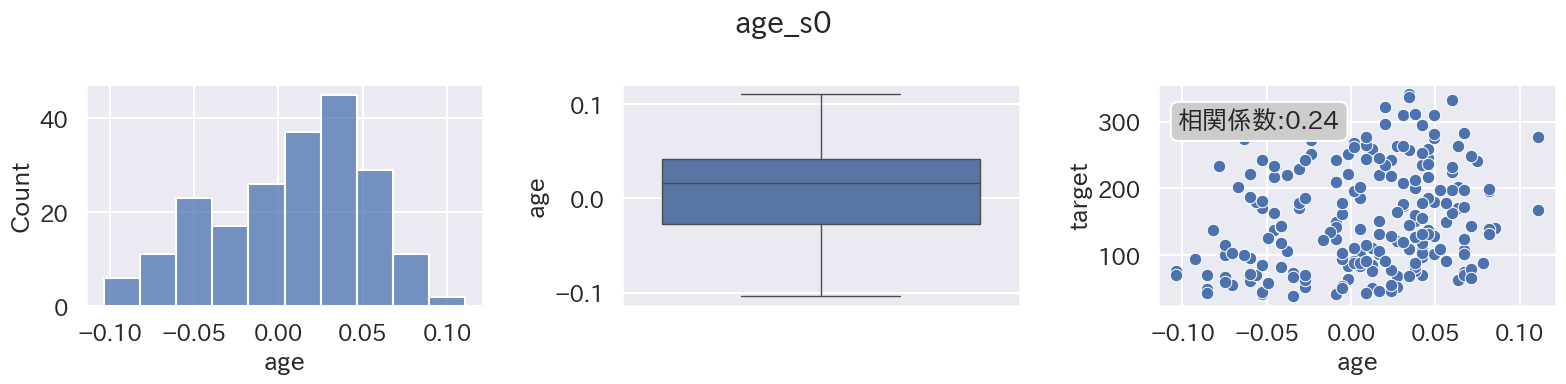

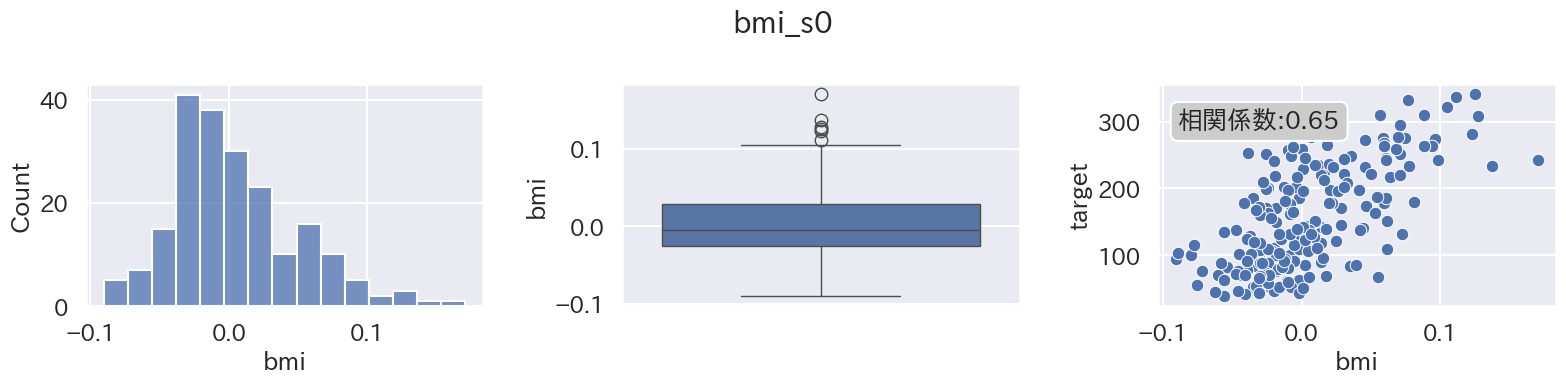

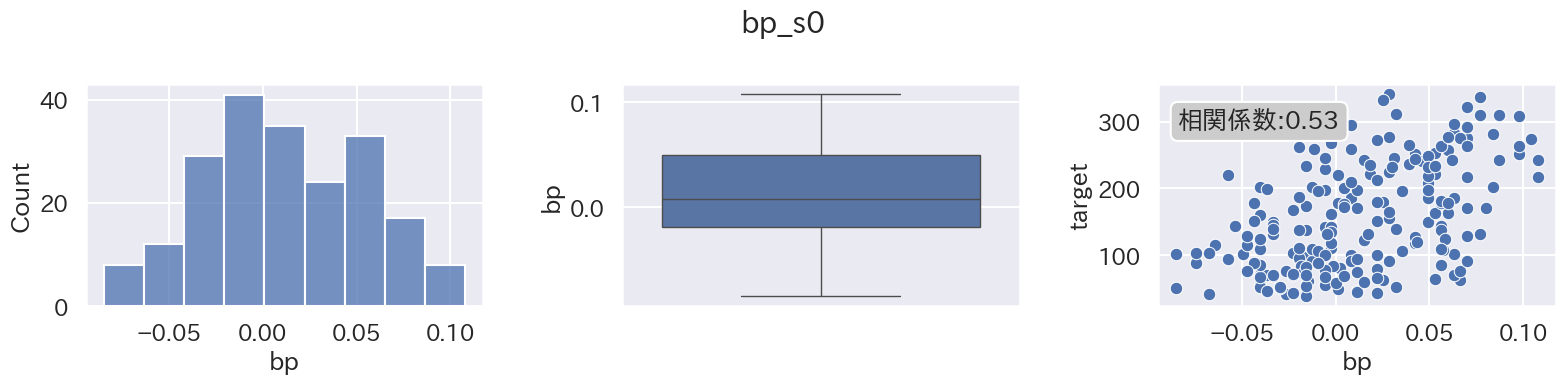

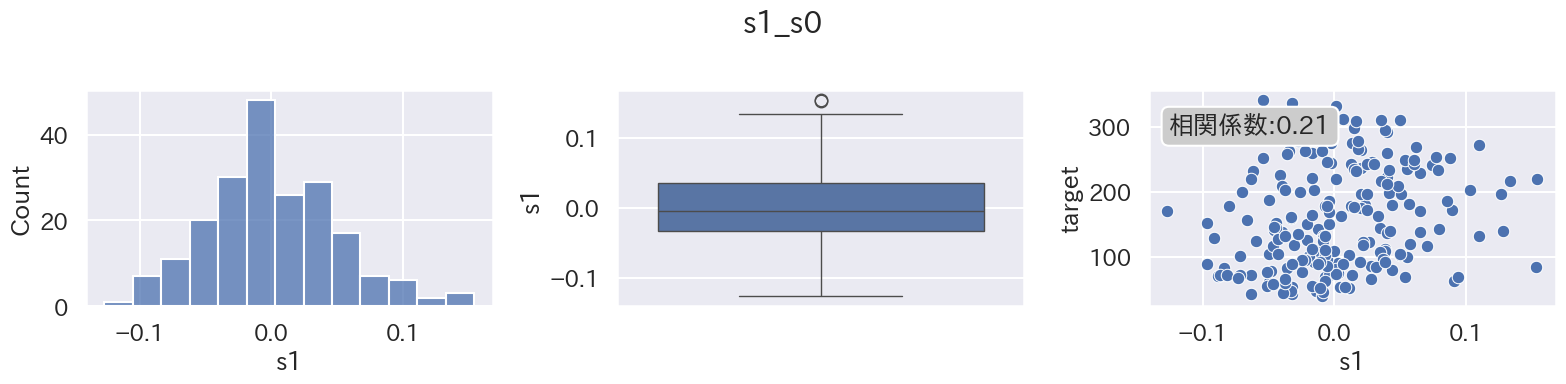

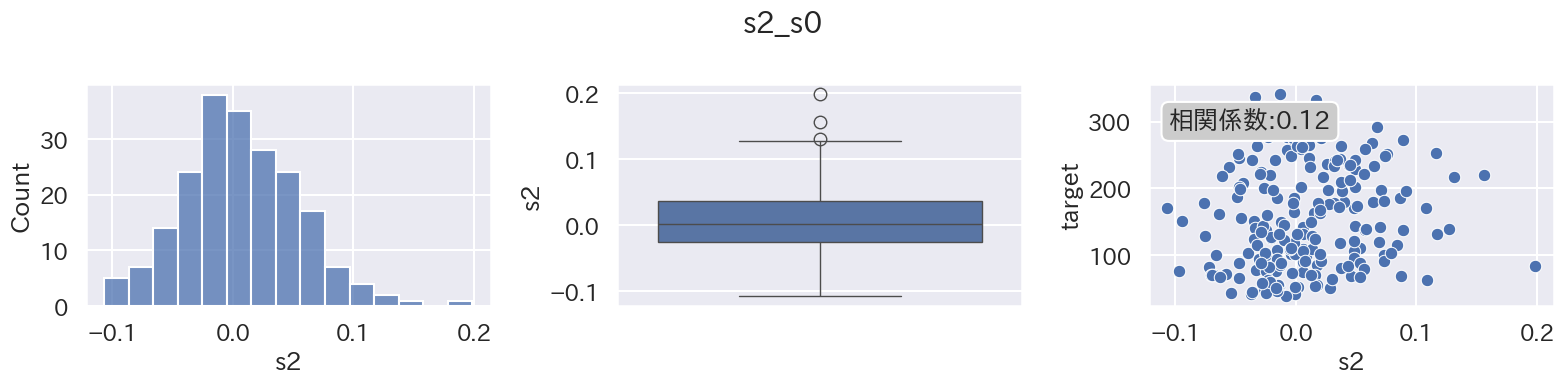

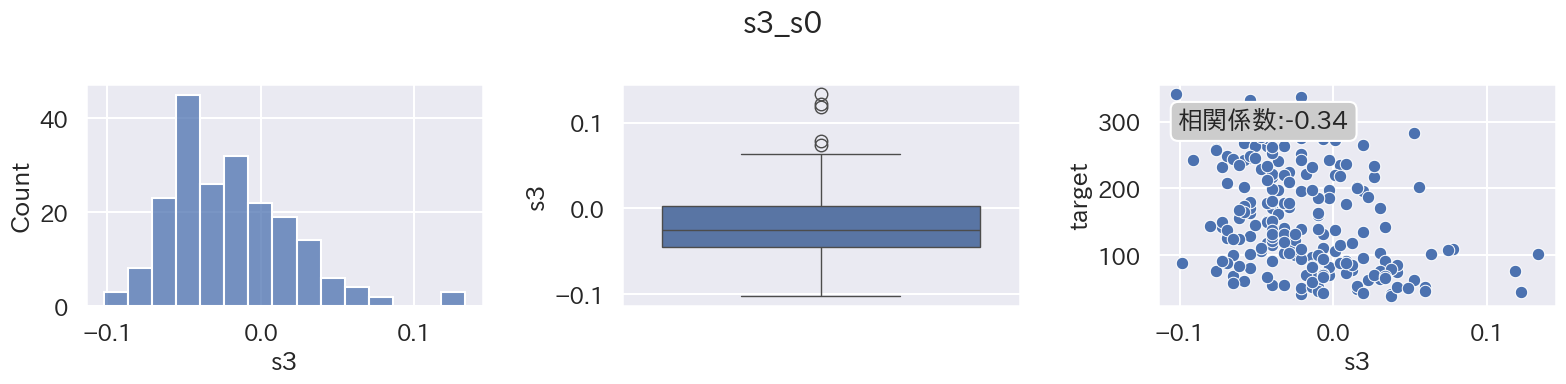

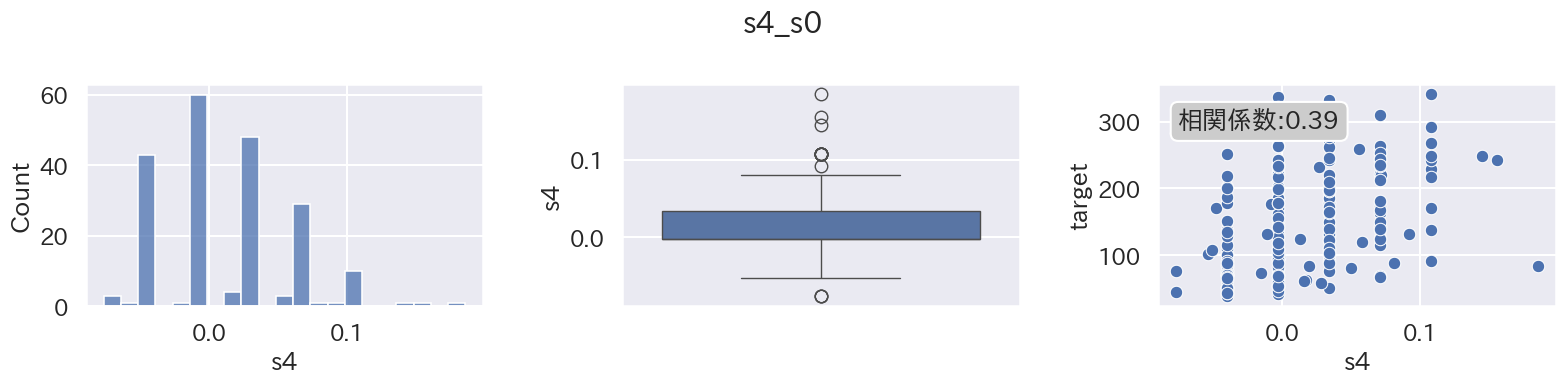

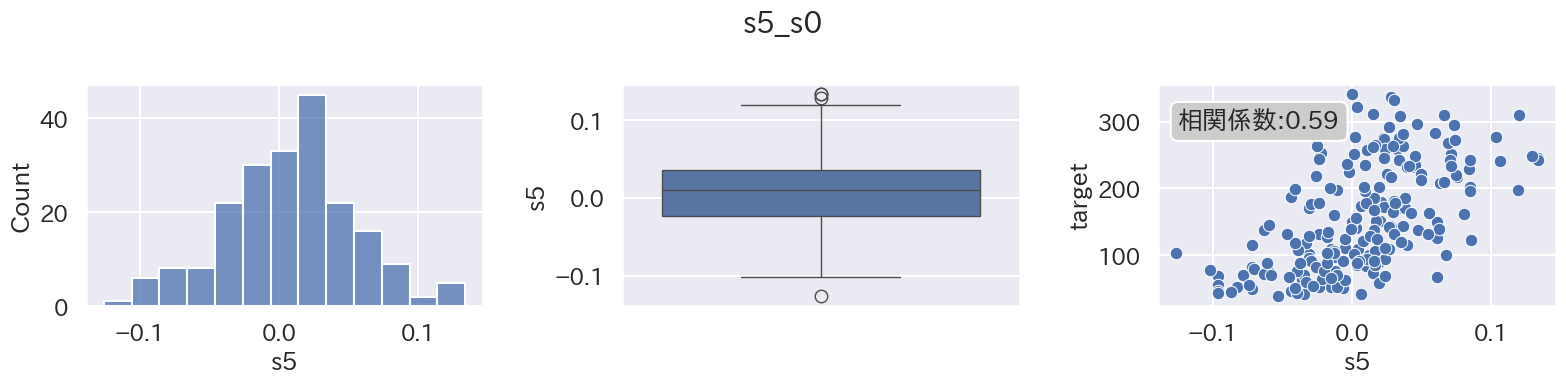

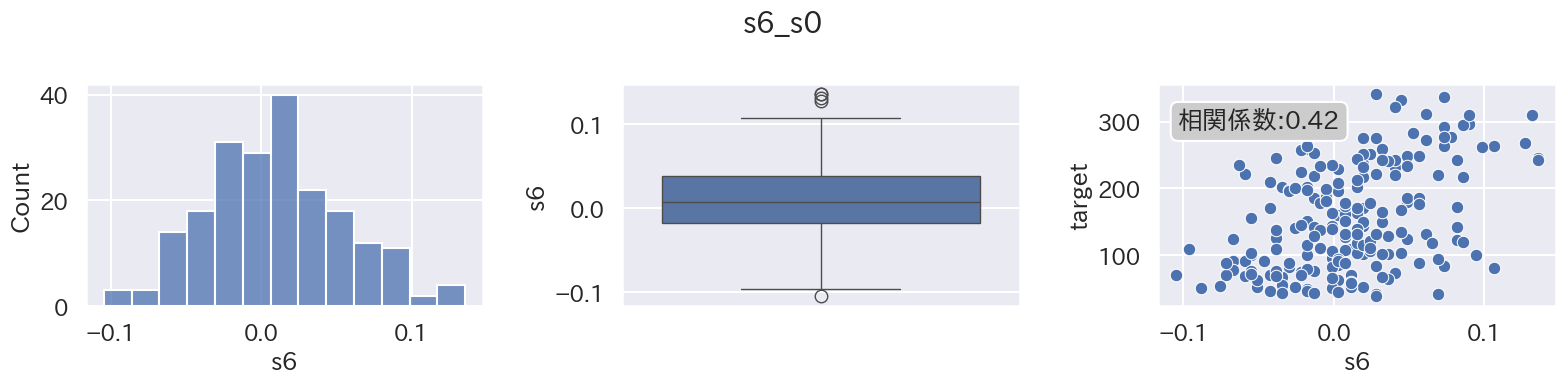

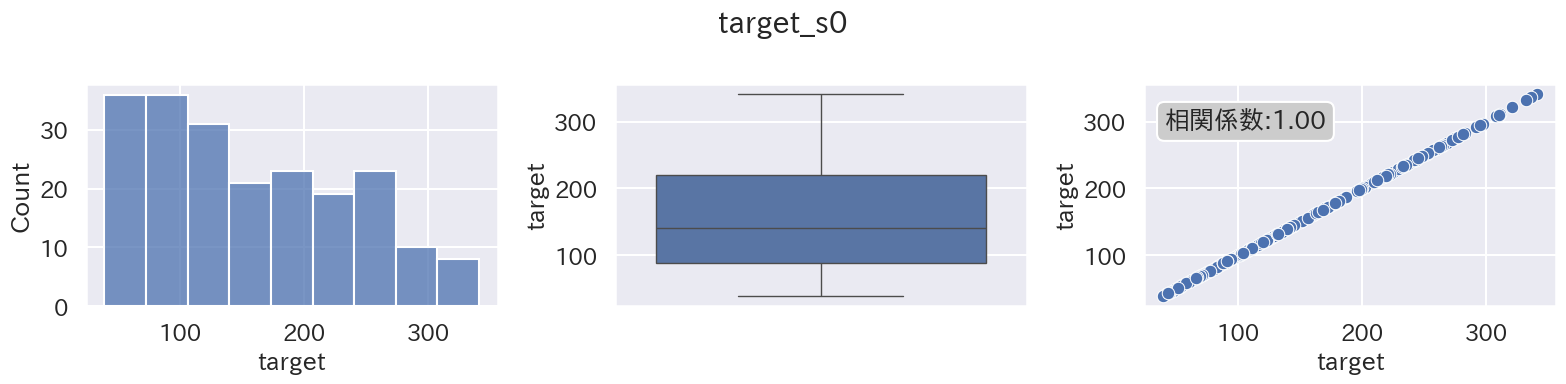

In [42]:
for feature in df_s0.columns:
	plot_data(feature)

In [43]:
def plot_data(feature):
	fig, axes = plt.subplots(1, 3, figsize=(16, 4), tight_layout=True)
	sns.histplot(data=df_s1, x=feature, palette='Set1', multiple='dodge', ax=axes[0], legend=False)
	sns.boxplot(data=df_s1, y=feature, ax=axes[1])
	axes[1].set_xticks([])
	sns.scatterplot(data=df_s1, x=feature, y=df_s1['target'], palette='Set1', ax=axes[2], legend=False)
	bbox = dict(boxstyle="round", fc="0.8")
	axes[2].annotate(f'相関係数:{df_s1[feature].corr(df_s1.target):.2f}', xy=(0.05, 0.8), xycoords='axes fraction', bbox=bbox)
	plt.suptitle(feature+'_s1')
	plt.show()

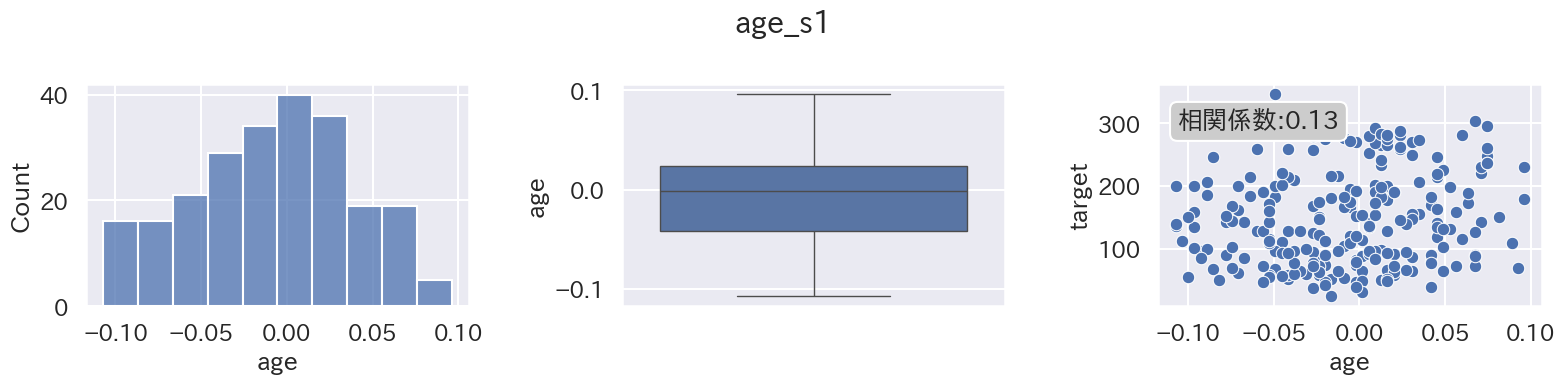

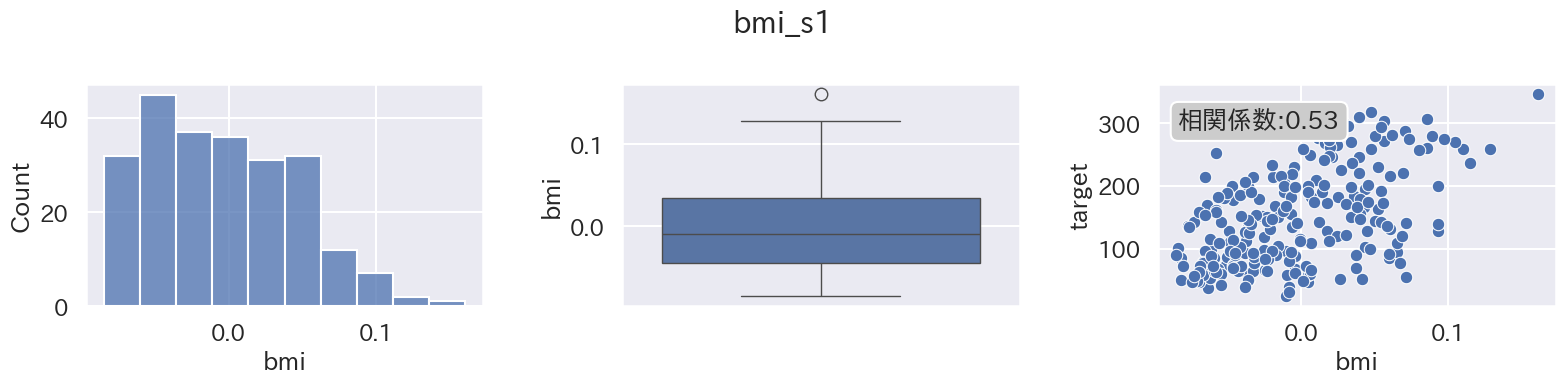

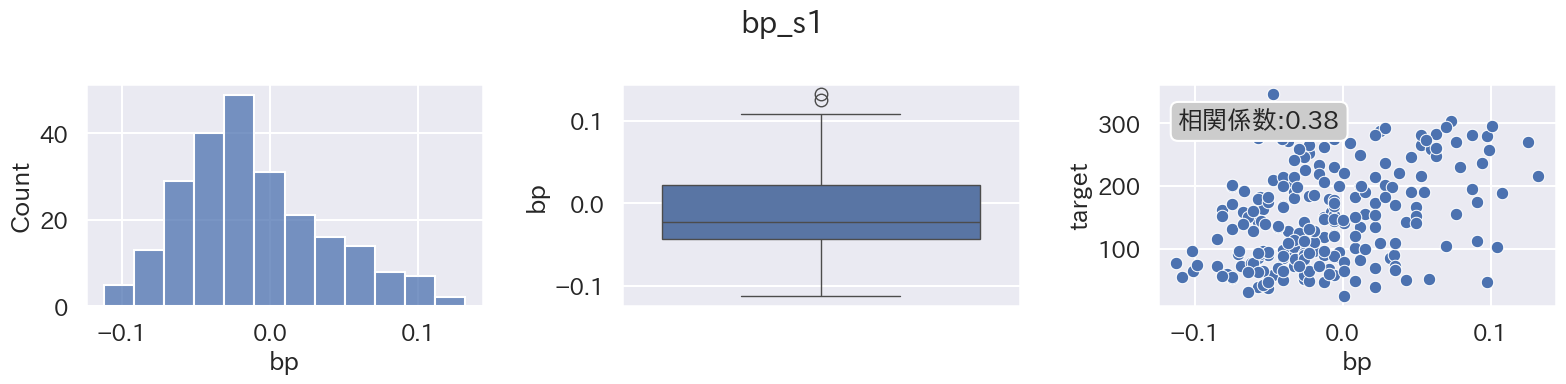

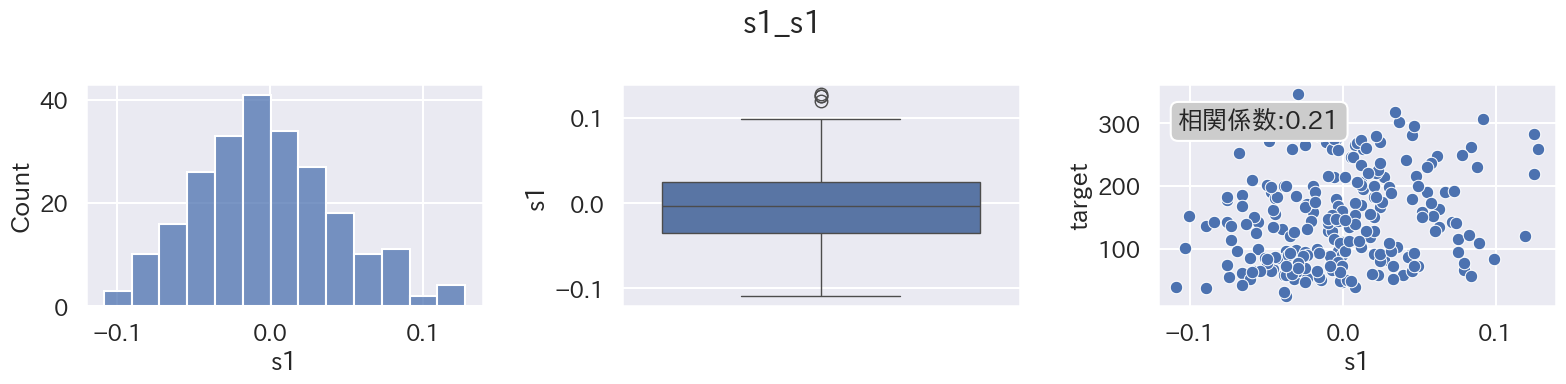

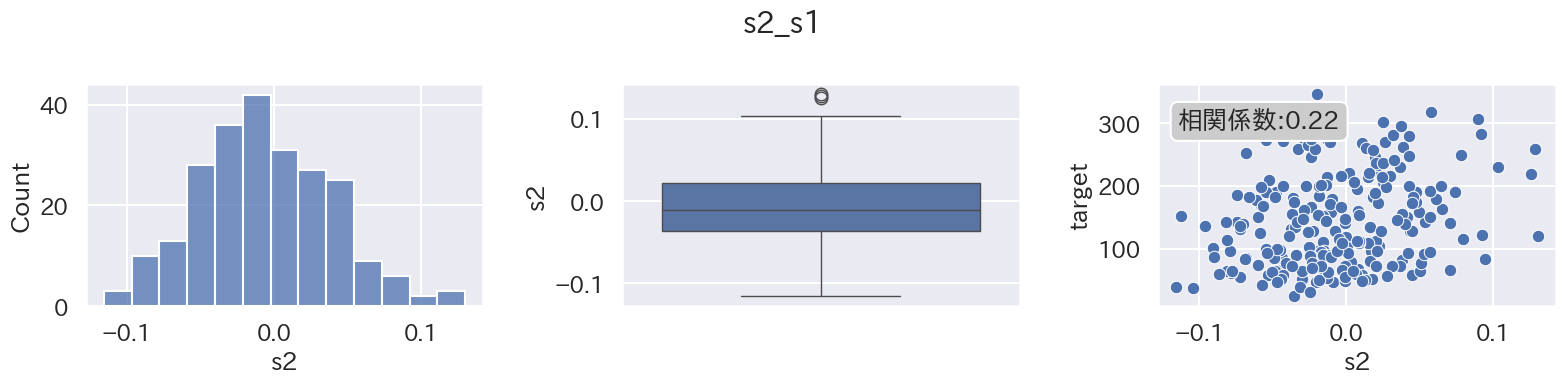

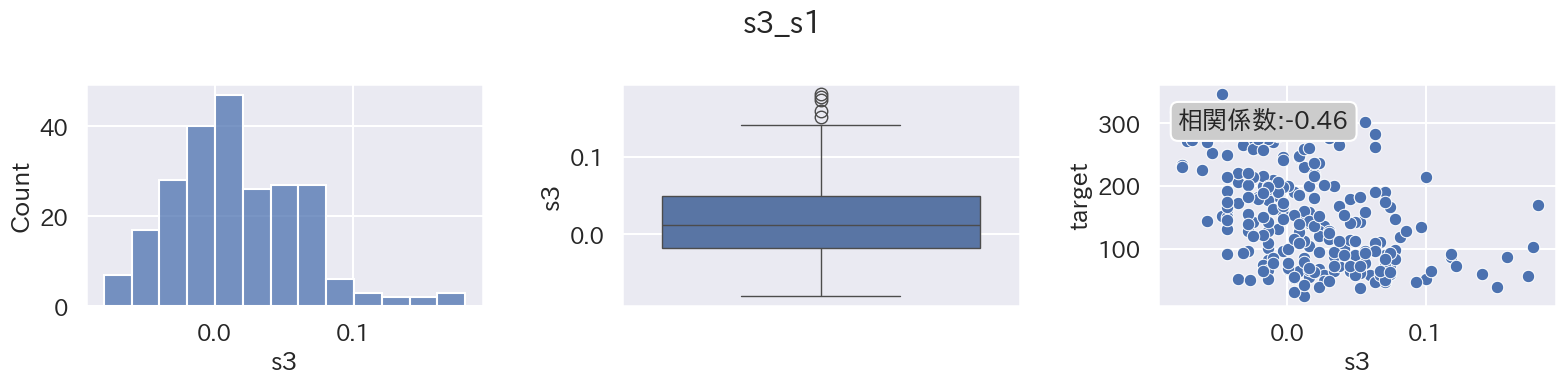

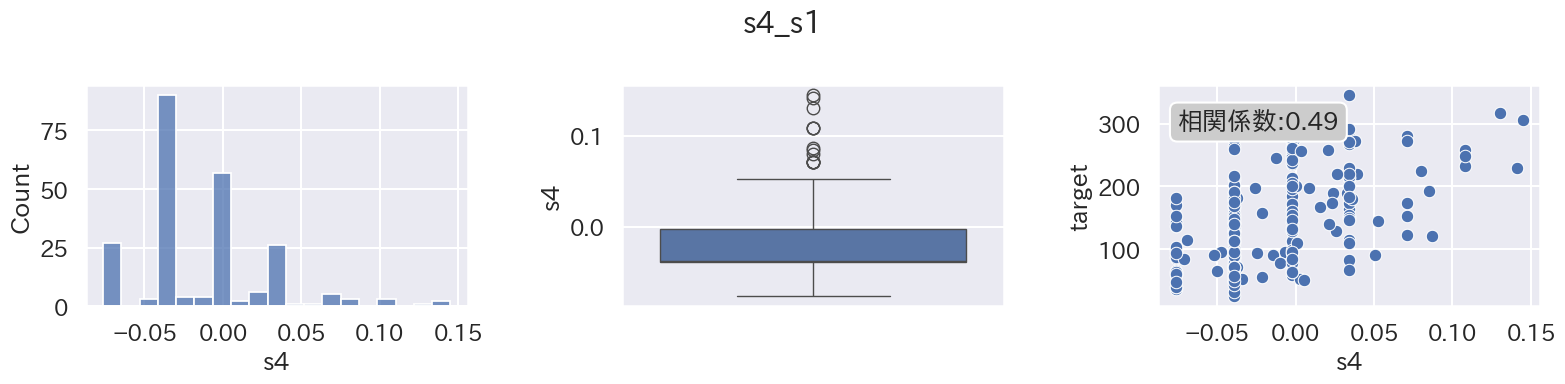

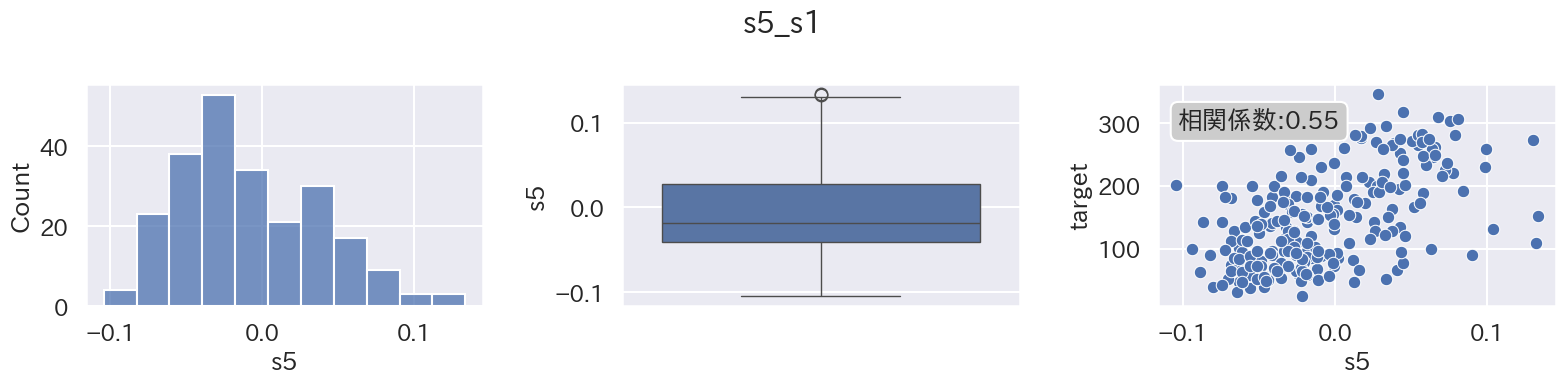

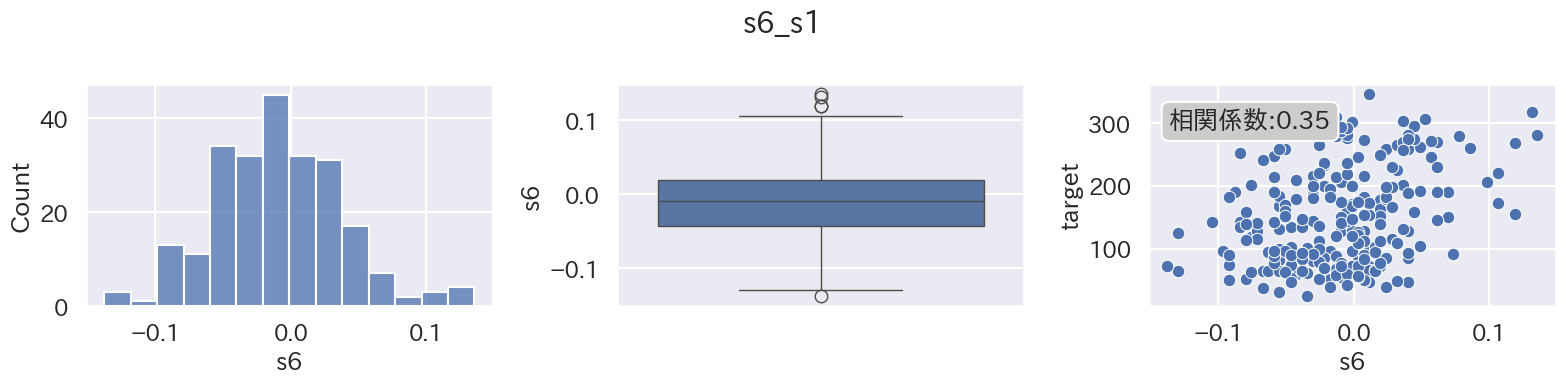

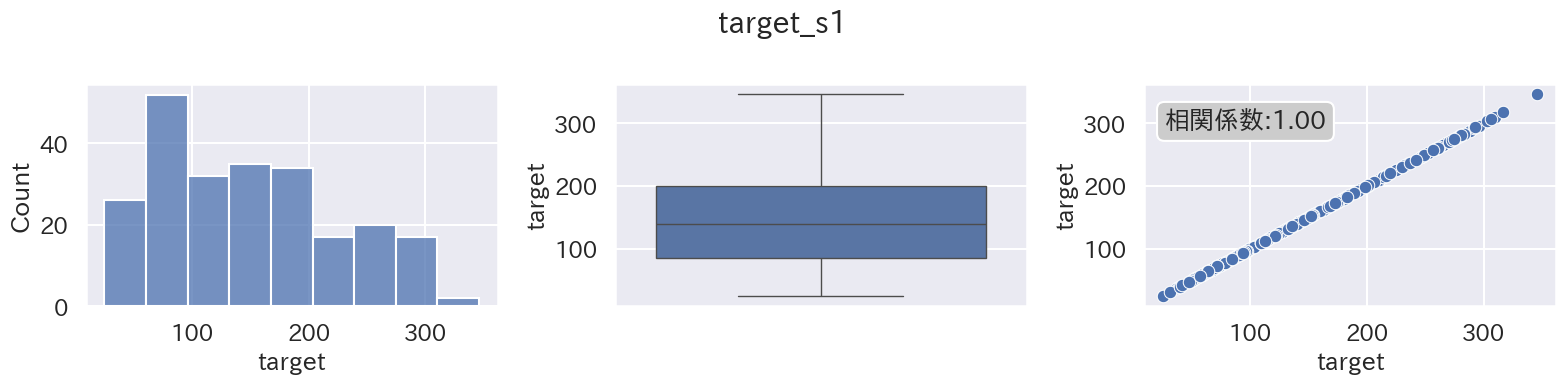

In [44]:
for feature in df_s1.columns:
	plot_data(feature)

トレインデータ、テストデータ

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17, shuffle=True)

In [47]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((309, 10), (309,), (133, 10), (133,))

In [53]:
X0_train, X0_test, y0_train, y0_test = train_test_split(df_s0.iloc[:,:-1], df_s0.iloc[:, -1], random_state=17, shuffle=True)
X0_train.shape, y0_train.shape, X0_test.shape, y0_test.shape

((155, 9), (155,), (52, 9), (52,))

In [54]:
X1_train, X1_test, y1_train, y1_test = train_test_split(df_s1.iloc[:,:-1], df_s1.iloc[:, -1], random_state=17, shuffle=True)
X1_train.shape, y1_train.shape, X1_test.shape, y1_test.shape

((176, 9), (176,), (59, 9), (59,))

---
<a id=2></a>
[Topへ](#0)

---
## 2. LinearRegression

* モデルのインポート  
    https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html  
* モデルインスタンスの作成
* モデルの構築・属性・予測・スコア
* モデルの構築・予測・属性
* 実測値と予測値の比較
* スコア
* 性別ごとのデータで試してみる
---

モデルのインポート

In [55]:
from sklearn.linear_model import LinearRegression

モデルインスタンスの作成

In [56]:
lr_model = LinearRegression()

モデルの構築・予測・属性

In [57]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [58]:
lr_pred = lr_model.predict(X_test)
lr_pred[:5]

array([177.43299832, 235.00503399,  95.42904239, 100.93741348,
       100.65578177])

In [59]:
X_test[0]

array([ 0.07076875, -0.04464164,  0.01211685,  0.04252949,  0.07135654,
        0.0534871 ,  0.05232174, -0.00259226,  0.02539508, -0.0052198 ])

In [60]:
test = np.array([ 0.07076875, -0.04464164, 0.01211685, 0.04252958, 0.07135654, 0.0534871 , 0.05232174, -0.00259226,  0.02539313, -0.0052198 ]).reshape(1, -1)
lr_model.predict(test)

array([177.43205689])

実測値と予測値の比較

In [66]:
df_result = pd.DataFrame()
df_result['true_value'] = y_test
df_result['prediction'] = lr_pred
df_result['residual'] = df_result['true_value'] - df_result['prediction']
df_result

true_value  prediction   residual
0         143.0  177.432998 -34.432998
1         192.0  235.005034 -43.005034
2         108.0   95.429042  12.570958
3         129.0  100.937413  28.062587
4         170.0  100.655782  69.344218
..          ...         ...        ...
128       152.0  111.134821  40.865179
129       102.0   95.319965   6.680035
130       261.0  233.429647  27.570353
131       272.0  189.574789  82.425211
132        84.0   96.479271 -12.479271

[133 rows x 3 columns]

<Axes: xlabel='None', ylabel='true_value'>

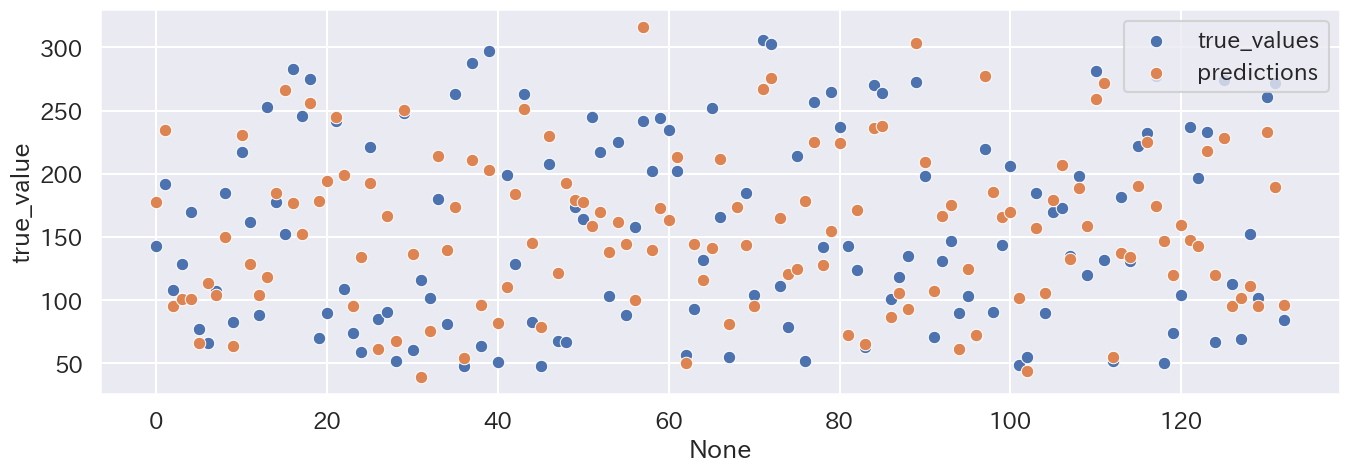

In [71]:
plt.figure(figsize=(16, 5))
sns.scatterplot(data=df_result, x=df_result.index, y='true_value', label='true_values')
sns.scatterplot(data=df_result, x=df_result.index, y='prediction', label='predictions')

In [93]:
df_result.sort_values('true_value', ascending=True, inplace=True)
df_result.reset_index(inplace=True)
df_result.head()

level_0  index  true_value  prediction   residual
0        3     36        48.0   54.407300  -6.407300
1       14     45        48.0   79.047690 -31.047690
2       30    101        49.0  101.591438 -52.591438
3       63    118        50.0  146.959780 -96.959780
4       16     40        51.0   81.807181 -30.807181

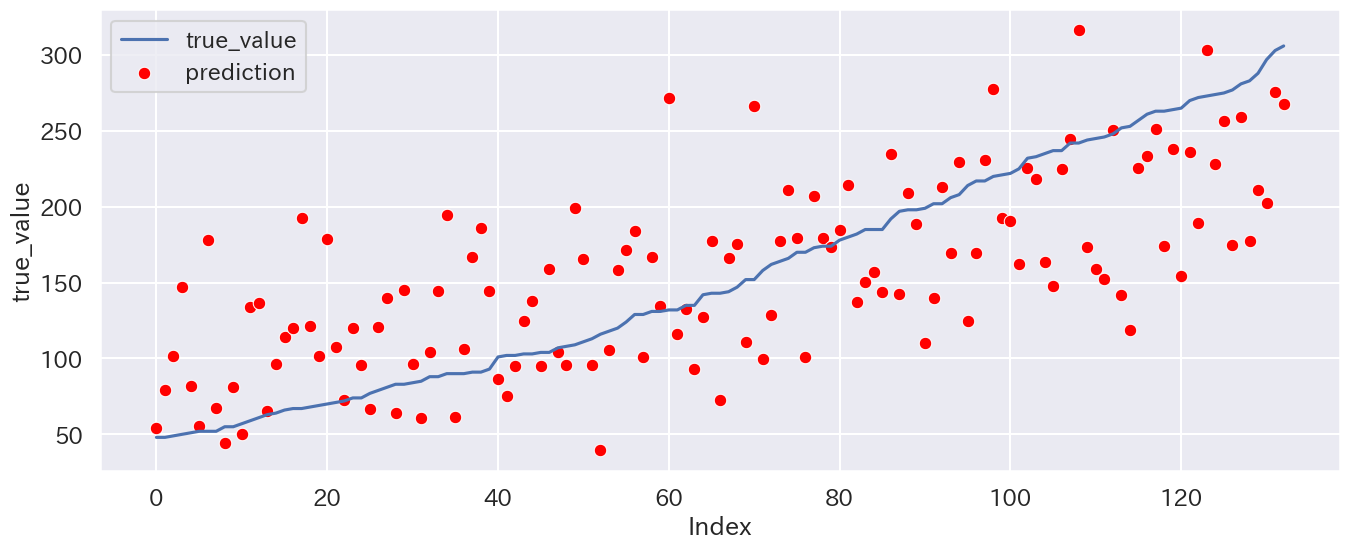

In [94]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=df_result, x=df_result.index, y='true_value', label='true_value')
sns.scatterplot(data=df_result, x=df_result.index, y='prediction', color='red', label='prediction')
plt.xlabel('Index')
plt.legend()
plt.show()

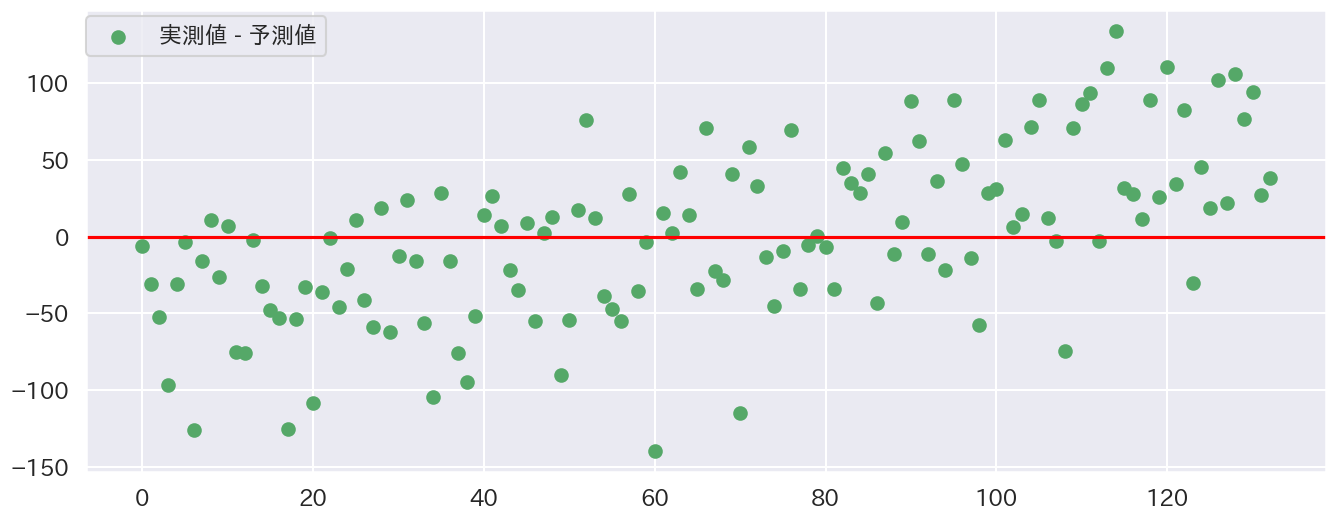

In [102]:
plt.figure(figsize=(16, 6))
plt.scatter(data=df_result, x=df_result.index, y='residual', label='実測値 - 予測値', color='g')
plt.axhline(0, color='red')
plt.legend(loc=(0, 0.9))
plt.show()

スコア

In [85]:
round(lr_model.score(X_test, y_test),4), round(lr_model.score(X_train, y_train),4)

(0.4653, 0.5213)

性別ごとのデータで試してみる

In [86]:
lr_model_s0 = LinearRegression()
lr_model_s0.fit(X0_train, y0_train)
round(lr_model_s0.score(X0_test, y0_test),4), round(lr_model_s0.score(X0_train, y0_train),4)

(0.5774, 0.5939)

In [87]:
lr_model_s1 = LinearRegression()
lr_model_s1.fit(X1_train, y1_train)
round(lr_model_s1.score(X1_test, y1_test),4), round(lr_model_s1.score(X1_train, y1_train),4)

(0.4778, 0.4723)

### 外れ値除去(全変数)

In [88]:
_df = df
mean = df.mean()
sigma = df.std()
cols = df.columns
for col in cols:
	# 3σ 法の上限値と下限値の設定
	high = mean[col] + 3 * sigma[col]
	low = mean[col] - 3 * sigma[col]

	# 条件の絞り込み
	_df = _df[(_df[col] >= low) & (_df[col] <= high)]

len(df), len(_df)

(442, 430)

In [90]:
X2, y2 = _df.iloc[:, :-1], _df.iloc[:, -1]
X2.shape, y2.shape

((430, 10), (430,))

In [91]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=17, shuffle=True, test_size=0.3)
X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape

((301, 10), (129, 10), (301,), (129,))

In [92]:
lr_model_new = LinearRegression()
lr_model_new.fit(X2_train, y2_train)
round(lr_model_new.score(X2_test, y2_test), 4), round(lr_model_new.score(X2_train, y2_train), 4)

(0.4529, 0.5189)

---
<a id=3></a>
[Topへ](#0)

---
## 3. RandomForestRegressor

* モデルのインポート  
    https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html 
* モデルインスタンスの作成
* モデルの構築・属性・予測・スコア
* パラメータを変更してみる
* Treeの可視化
---

モデルのインポート

In [103]:
from sklearn.ensemble import RandomForestRegressor

モデルインスタンスの作成

In [116]:
rf_model = RandomForestRegressor(
    n_estimators=100,   # DecisionTreeRegressorの数
    max_depth=None,   # 分岐を最大何回まで行うか
    min_samples_split=2,    # サンプルが最小いくつまで分岐を行うか（最小であり、達する前に止まることもある）
    min_samples_leaf=1,   # 末端での最小のサンプル数
    max_features=1.0,   # 最大いくつの特徴量を使うか。「最大」なので1.0の場合はすべて使うことも1割を使うこともある
    bootstrap=True,   # 多様性を増やすためのサンプルのランダムな割り当て
    random_state=17,
    max_samples=None   # bootstrap=Trueの場合のサンプルの最大数。0-1.0で指定すればよい
)

モデルの構築・属性・予測・スコア

In [117]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=17)

In [118]:
rf_model.estimator_

DecisionTreeRegressor()

In [110]:
# rf_model.estimators_

In [119]:
rf_pred = rf_model.predict(X_test)
rf_pred[:5]

array([177.29, 221.03,  95.38, 127.42, 111.14])

In [120]:
round(rf_model.score(X_test, y_test), 4), round(rf_model.score(X_train, y_train),4)

(0.4916, 0.9199)

パラメータを変更してみる

In [136]:
len(X_train)

309

In [121]:
rf_model_new = RandomForestRegressor(
    n_estimators=120,   # DecisionTreeRegressorの数
    max_depth=4,   # 分岐を最大何回まで行うか
    min_samples_split=5,    # サンプルが最小いくつまで分岐を行うか（最小であり、達する前に止まることもある）
    min_samples_leaf=1,   # 末端での最小のサンプル数
    max_features=0.6,   # 最大いくつの特徴量を使うか。「最大」なので1.0の場合はすべて使うことも1割を使うこともある
    bootstrap=True,   # 多様性を増やすためのサンプルのランダムな割り当て
    random_state=17,
    max_samples=0.7   # bootstrap=Trueの場合のサンプルの最大数。0-1.0で指定すればよい
)

In [122]:
rf_model_new.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, max_features=0.6, max_samples=0.7,
                      min_samples_split=5, n_estimators=120, random_state=17)

In [123]:
round(rf_model_new.score(X_test, y_test),4), round(rf_model_new.score(X_train, y_train),4)

(0.5116, 0.6377)

Treeの可視化

In [124]:
from sklearn.tree import plot_tree

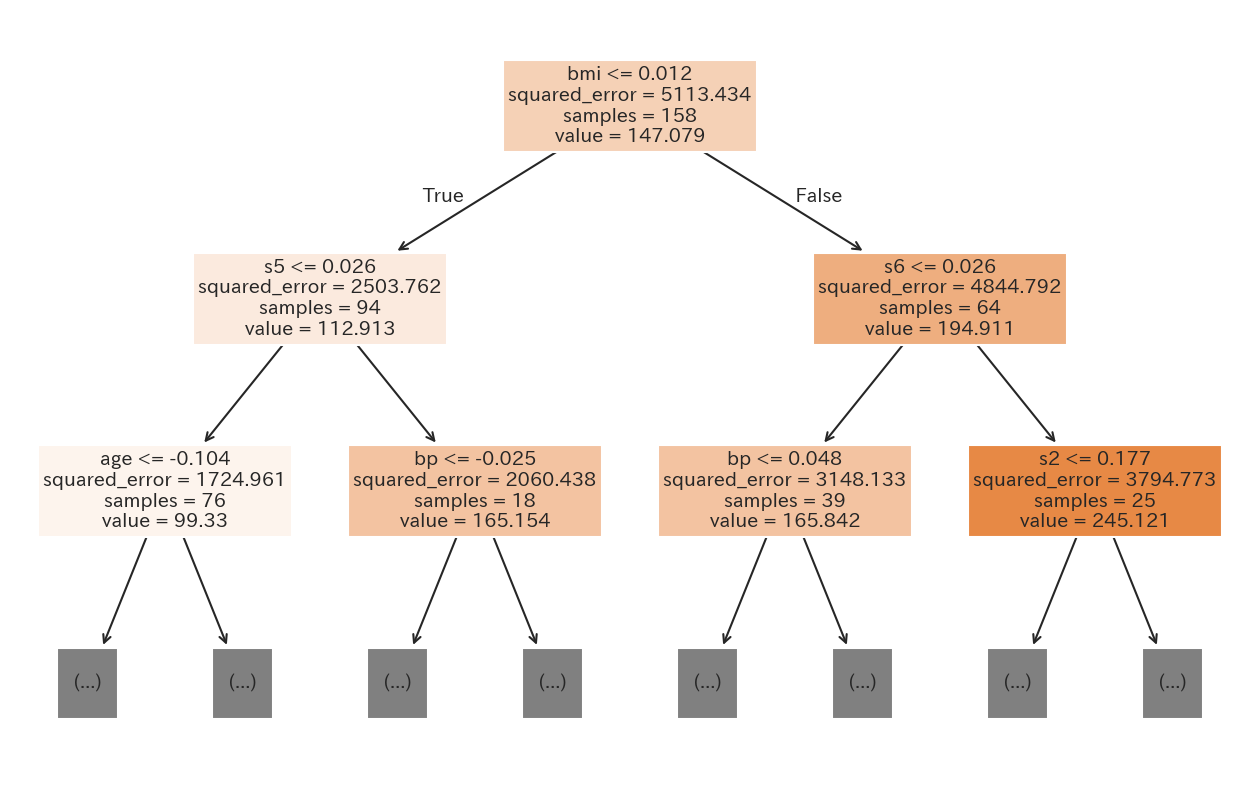

In [132]:
plt.figure(figsize=(16, 10))
plot_tree(rf_model_new.estimators_[0], max_depth=2, fontsize=14, feature_names=diabetes.feature_names, filled=True);

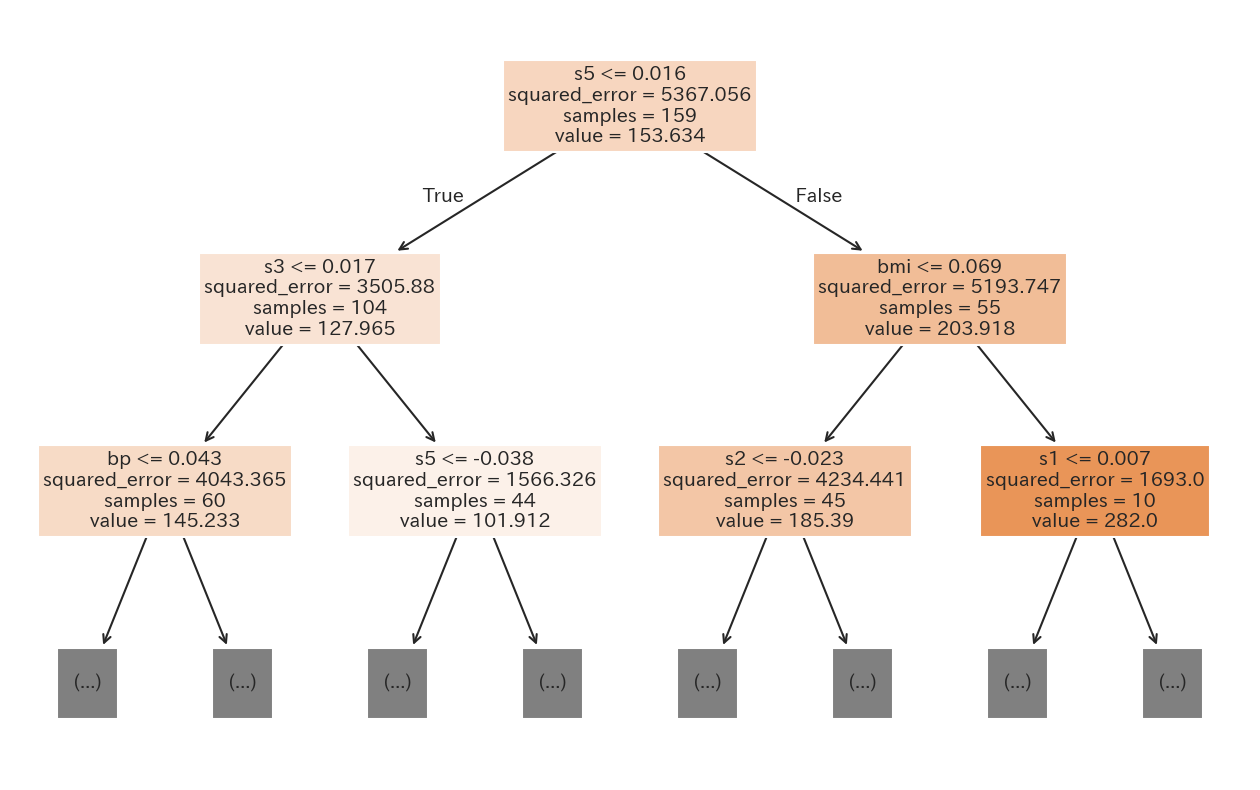

In [133]:
plt.figure(figsize=(16, 10))
plot_tree(rf_model_new.estimators_[1], max_depth=2, fontsize=14, feature_names=diabetes.feature_names, filled=True);

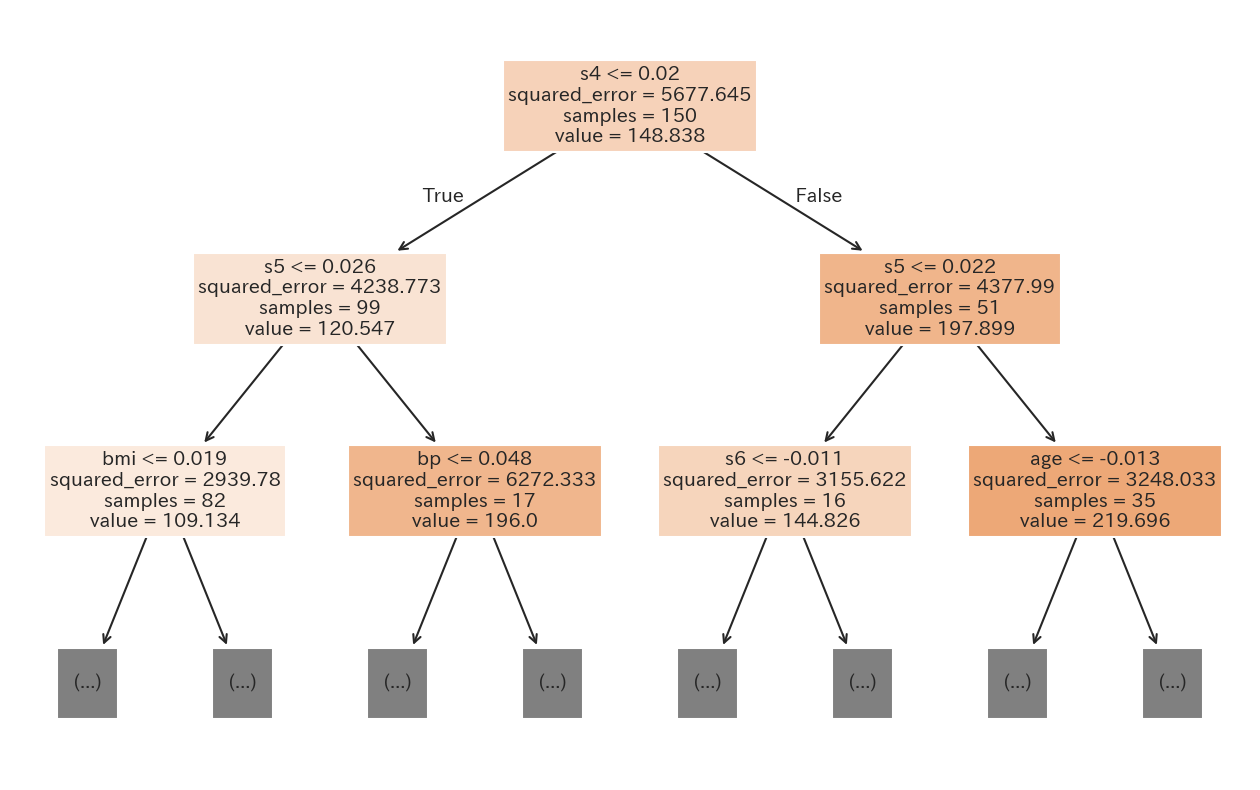

In [134]:
plt.figure(figsize=(16, 10))
plot_tree(rf_model_new.estimators_[2], max_depth=2, fontsize=14, feature_names=diabetes.feature_names, filled=True);

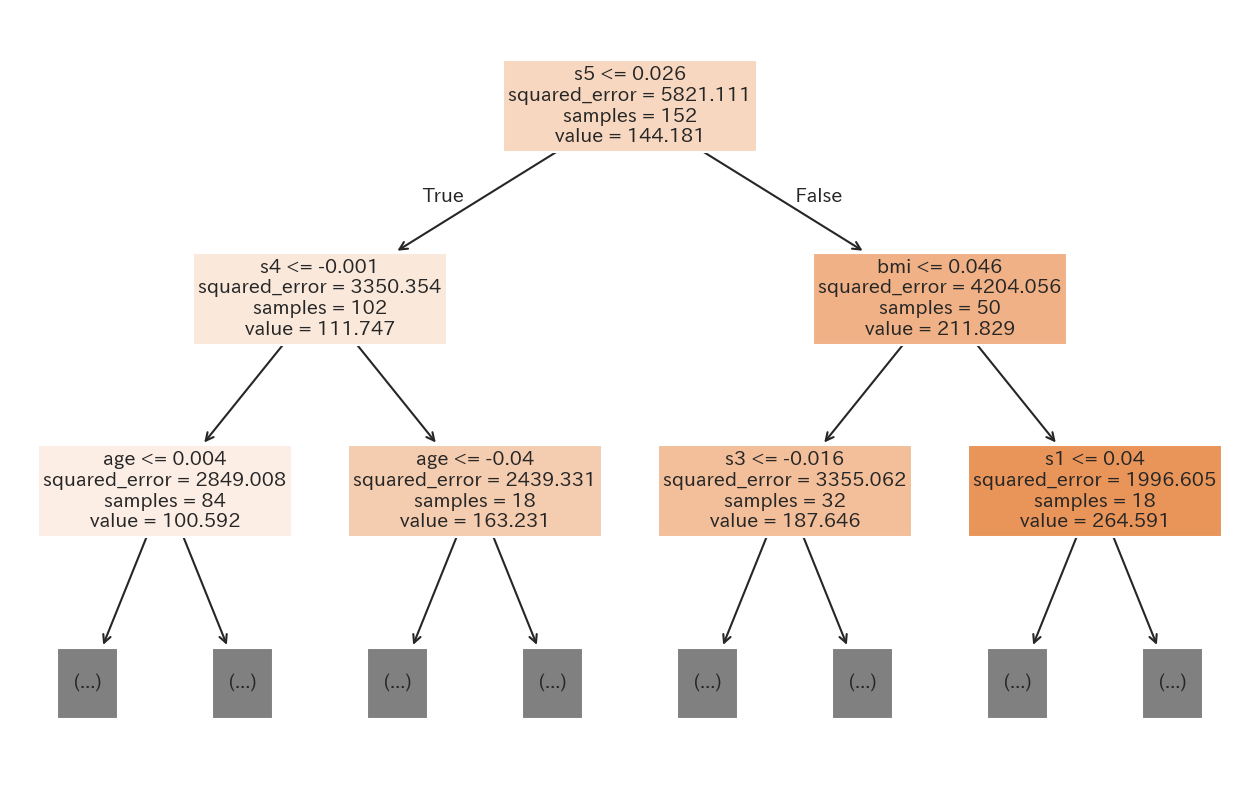

In [138]:
plt.figure(figsize=(16, 10))
plot_tree(rf_model_new.estimators_[15], max_depth=2, fontsize=14, feature_names=diabetes.feature_names, filled=True);

---
<a id=4></a>
[Topへ](#0)

---
## 4. KNeighborsRegressor

* モデルのインポート  
     https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html  
* モデルインスタンスの作成・スコア
* パラメータを変更してみる
---

モデルのインポート

In [139]:
from sklearn.neighbors import KNeighborsRegressor

モデルインスタンスの作成・スコア

In [140]:
kn_model = KNeighborsRegressor(n_neighbors=5, weights='uniform')

In [141]:
kn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [142]:
round(kn_model.score(X_test, y_test),4), round(kn_model.score(X_train, y_train),4)

(0.3936, 0.5679)

パラメータを変更してみる

In [143]:
kn_model_new = KNeighborsRegressor(n_neighbors=10, weights='uniform')

In [144]:
kn_model_new.fit(X_train, y_train)
round(kn_model_new.score(X_test, y_test),4), round(kn_model_new.score(X_train, y_train),4)

(0.459, 0.5367)

---
<a id=5></a>
[Topへ](#0)

---
## 5. モデルの評価方法

* 評価指標
* モデルを評価する
* R2スコア(決定係数)とは
---

評価指標  
絶対平均誤差　/　二乗平均誤差　/　絶対パーセント誤差　/　R二乗値（決定係数）

In [145]:
models = [lr_model, rf_model_new, kn_model_new]

In [146]:
from sklearn.metrics import accuracy_score, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error, r2_score

モデルを評価する

In [165]:
def eval_model(model, X_train, X_test, y_train, y_test):
	model.fit(X_train, y_train)
	pred = np.round(model.predict(X_test))
	score = np.round(model.score(X_test, y_test),4)
	mae = np.round(mean_absolute_error(y_true=y_test, y_pred=pred), 4)
	mape = np.round(mean_absolute_percentage_error(y_true=y_test, y_pred=pred), 4)
	rmse = np.round(root_mean_squared_error(y_true=y_test, y_pred=pred), 4)
	r2 = np.round(r2_score(y_true=y_test, y_pred=pred), 4)
	print(f'{model}\n')
	print(f'score : {score}, MAE : {mae}, MAPE : {mape}%, RSME : {rmse}, r2_score : {r2} \n')
	print('='*80+'\n')

In [166]:
for model in models:
	eval_model(model, X_train, X_test, y_train, y_test)

LinearRegression()

score : 0.4653, MAE : 43.8271, MAPE : 0.363%, RSME : 55.1528, r2_score : 0.4654 


RandomForestRegressor(max_depth=4, max_features=0.6, max_samples=0.7,
                      min_samples_split=5, n_estimators=120, random_state=17)

score : 0.5116, MAE : 43.3158, MAPE : 0.3646%, RSME : 52.7145, r2_score : 0.5117 


KNeighborsRegressor(n_neighbors=10)

score : 0.459, MAE : 44.9624, MAPE : 0.3752%, RSME : 55.4837, r2_score : 0.459 




R2スコア(決定係数)とは

* R2 = 1 - Σ{( true_value(i) - pred(i) ) ** 2} / Σ{( true_value(i) - true_value_mean ) ** 2}
* 1に近いほど回帰式の精度が高い
* もし、すべてを「平均」で予想した場合(最も安易な？予想)　=> R2 = 0
* 0.5以上：予測精度がそれなりに高いと言える
* 0.7以上：予測精度が高い
* 0.9以上：精度が非常に高い。ただし、過学習でないかの検討も必要  
※　絶対的な基準は存在しません。あくまでも目安として用いる指標です

---
<a id=6></a>
[Topへ](#0)

---
## 6. クロスバリデーションとグリッドサーチ

* KFold  
    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
* cross_val_score  
    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
* GridSearchCV  
    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
---

KFold

In [167]:
from sklearn.model_selection import KFold, cross_val_score

In [168]:
k = KFold(n_splits=5, shuffle=True, random_state=17)

In [170]:
set_1, set_2, set_3, set_4, set_5 = k.split(X)

In [181]:
print(f'{len(set_1[0])}, {len(set_1[1])}, {len(set_1[0])+len(set_1[1])}')
print(f'{len(set_2[0])}, {len(set_2[1])}, {len(set_2[0])+len(set_2[1])}')
print(f'{len(set_3[0])}, {len(set_3[1])}, {len(set_3[0])+len(set_3[1])}')
print(f'{len(set_4[0])}, {len(set_4[1])}, {len(set_4[0])+len(set_4[1])}')
print(f'{len(set_5[0])}, {len(set_5[1])}, {len(set_5[0])+len(set_5[1])}')

353, 89, 442
353, 89, 442
354, 88, 442
354, 88, 442
354, 88, 442


cross_val_score

In [184]:
cv_scores_lr_model = np.round(cross_val_score(lr_model, X, y, cv=k), 3)
cv_scores_lr_model

array([0.453, 0.504, 0.517, 0.409, 0.523])

In [186]:
mean_cv_scores_lr_model = cv_scores_lr_model.mean()
mean_cv_scores_lr_model

0.4812

In [190]:
for model in models:
	cv_scores_model = np.round(cross_val_score(model, X, y, cv=k), 3)
	mean_cv_scores_model = np.round(cv_scores_model.mean(), 3)
	print(f'{model}\n')
	print(f'mean_CV_Score : {mean_cv_scores_model}\n')
	print('='*50+'\n')

LinearRegression()

mean_CV_Score : 0.481


RandomForestRegressor(max_depth=4, max_features=0.6, max_samples=0.7,
                      min_samples_split=5, n_estimators=120, random_state=17)

mean_CV_Score : 0.45


KNeighborsRegressor(n_neighbors=10)

mean_CV_Score : 0.421




GridSearchCV

In [191]:
from sklearn.model_selection import GridSearchCV

In [192]:
# rf_modelのパラメータを変更する
# max_depth=4, min_samples_split=5, max_features=0.6, max_samples=0.7
params = {
    'max_depth':[2, 6, 10],
    'max_features':[0.5, 0.9],
    'max_samples':[0.5, 0.9],
    'min_samples_split':[3, 6]
}
# 計２４の組み合わせで結果を取得できる

In [194]:
rf_model = RandomForestRegressor()

In [195]:
grid = GridSearchCV(rf_model, param_grid=params, cv=k)

In [196]:
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=17, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 6, 10], 'max_features': [0.5, 0.9],
                         'max_samples': [0.5, 0.9],
                         'min_samples_split': [3, 6]})

In [197]:
grid.cv_results_

{'mean_fit_time': array([0.12235293, 0.12503242, 0.1155087 , 0.12069583, 0.12411089,
        0.13024883, 0.17596159, 0.14222584, 0.1560102 , 0.13713527,
        0.16724467, 0.15624137, 0.18210526, 0.16134171, 0.1914113 ,
        0.19401073, 0.15775337, 0.14868178, 0.17620163, 0.16807661,
        0.2198379 , 0.20802979, 0.22089643, 0.22384772]),
 'std_fit_time': array([0.02054173, 0.01154873, 0.00063668, 0.00208959, 0.00272764,
        0.01677057, 0.06494871, 0.01119466, 0.0159796 , 0.00113584,
        0.01376432, 0.00232459, 0.01531072, 0.00470098, 0.0038771 ,
        0.01268886, 0.00568145, 0.0113621 , 0.00371445, 0.00786604,
        0.04623483, 0.05907581, 0.00222561, 0.02339211]),
 'mean_score_time': array([0.00556073, 0.00604763, 0.00541477, 0.00527806, 0.00574422,
        0.00588603, 0.00571742, 0.0064517 , 0.00513563, 0.00635166,
        0.00625048, 0.00571876, 0.00605531, 0.00569162, 0.00616741,
        0.00573397, 0.00607433, 0.00747738, 0.00636892, 0.00623236,
        0.006345

In [199]:
pd.DataFrame(grid.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.122353      0.020542         0.005561        0.001019   
1        0.125032      0.011549         0.006048        0.001207   
2        0.115509      0.000637         0.005415        0.000839   
3        0.120696      0.002090         0.005278        0.000275   
4        0.124111      0.002728         0.005744        0.000297   
5        0.130249      0.016771         0.005886        0.001024   
6        0.175962      0.064949         0.005717        0.001040   
7        0.142226      0.011195         0.006452        0.001775   
8        0.156010      0.015980         0.005136        0.000139   
9        0.137135      0.001136         0.006352        0.001410   
10       0.167245      0.013764         0.006250        0.001188   
11       0.156241      0.002325         0.005719        0.000877   
12       0.182105      0.015311         0.006055        0.001013   
13       0.161342      0.004701         0.005692        0.000788   
14       0.191411      0.003877         0.006167        0.000835   
15       0.194011      0.012689         0.005734        0.000935   
16       0.157753      0.005681         0.006074        0.000688   
17       0.148682      0.011362         0.007477        0.001334   
18       0.176202      0.003714         0.006369        0.000701   
19       0.168077      0.007866         0.006232        0.000912   
20       0.219838      0.046235         0.006346        0.000511   
21       0.208030      0.059076         0.005757        0.000441   
22       0.220896      0.002226         0.005810        0.000383   
23       0.223848      0.023392         0.005565        0.000380   

    param_max_depth  param_max_features  param_max_samples  \
0                 2                 0.5                0.5   
1                 2                 0.5                0.5   
2                 2                 0.5                0.9   
3                 2                 0.5                0.9   
4                 2                 0.9                0.5   
5                 2                 0.9                0.5   
6                 2                 0.9                0.9   
7                 2                 0.9                0.9   
8                 6                 0.5                0.5   
9                 6                 0.5                0.5   
10                6                 0.5                0.9   
11                6                 0.5                0.9   
12                6                 0.9                0.5   
13                6                 0.9                0.5   
14                6                 0.9                0.9   
15                6                 0.9                0.9   
16               10                 0.5                0.5   
17               10                 0.5                0.5   
18               10                 0.5                0.9   
19               10                 0.5                0.9   
20               10                 0.9                0.5   
21               10                 0.9                0.5   
22               10                 0.9                0.9   
23               10                 0.9                0.9   

    param_min_samples_split  \
0                         3   
1                         6   
2                         3   
3                         6   
4                         3   
5                         6   
6                         3   
7                         6   
8                         3   
9                         6   
10                        3   
11                        6   
12                        3   
13                        6   
14                        3   
15                        6   
16                        3   
17                        6   
18                        3   
19                        6   
20                        3   
21                        6   
22                        3   
23      

In [204]:
result_df = pd.DataFrame(grid.cv_results_).sort_values('rank_test_score', ascending=True).loc[:, 'params':].reset_index()
result_df.head()

index                                             params  \
0      8  {'max_depth': 6, 'max_features': 0.5, 'max_sam...   
1     12  {'max_depth': 6, 'max_features': 0.9, 'max_sam...   
2     20  {'max_depth': 10, 'max_features': 0.9, 'max_sa...   
3     13  {'max_depth': 6, 'max_features': 0.9, 'max_sam...   
4     21  {'max_depth': 10, 'max_features': 0.9, 'max_sa...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.461563           0.538039           0.419152           0.411492   
1           0.474201           0.541365           0.405635           0.384779   
2           0.473332           0.524768           0.414199           0.383185   
3           0.439843           0.544166           0.433672           0.381247   
4           0.465365           0.538003           0.400791           0.389051   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.460163         0.458082        0.044935                1  
1           0.479560         0.457108        0.056172                2  
2           0.479404         0.454977        0.050242                3  
3           0.456545         0.451095        0.052917                4  
4           0.453029         0.449248        0.053148                5

In [205]:
# 最高のparams

result_df['params'][0]

{'max_depth': 6,
 'max_features': 0.5,
 'max_samples': 0.5,
 'min_samples_split': 3}

In [206]:
# 最高のparams

grid.best_params_

{'max_depth': 6,
 'max_features': 0.5,
 'max_samples': 0.5,
 'min_samples_split': 3}

In [207]:
from sklearn.preprocessing import RobustScaler

In [208]:
scaler = RobustScaler()

In [209]:
X_scaled = scaler.fit_transform(df.iloc[:, :-1])

In [210]:
for model in models:
	cv_scores_model = np.round(cross_val_score(model, X_scaled, y, cv=k), 3)
	mean_cv_scores_model = np.round(cv_scores_model.mean(), 3)
	print(f'{model}\n')
	print(f'mean_CV_Score : {mean_cv_scores_model}\n')
	print('='*50+'\n')

LinearRegression()

mean_CV_Score : 0.481


RandomForestRegressor(max_depth=4, max_features=0.6, max_samples=0.7,
                      min_samples_split=5, n_estimators=120, random_state=17)

mean_CV_Score : 0.449


KNeighborsRegressor(n_neighbors=10)

mean_CV_Score : 0.427




In [211]:
grid.fit(X_scaled, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=17, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 6, 10], 'max_features': [0.5, 0.9],
                         'max_samples': [0.5, 0.9],
                         'min_samples_split': [3, 6]})

In [212]:
grid.best_score_

0.46550467357899433

In [213]:
grid.best_params_

{'max_depth': 6,
 'max_features': 0.5,
 'max_samples': 0.5,
 'min_samples_split': 3}

---
 <a id=4></a>
[Topへ](#0)

---
## 以上
    
---